In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.preprocessing import StandardScaler , OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import cross_val_score, KFold


pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel(r"c://Users/ilike/1.data/data_mid_bootcamp_project_regression/regression_data.xls")
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


## 1.1 Initial look at Dataset and values, checking for nulls or incomplete sets.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [4]:
# Checking for nulls.
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# All of our data is complete and no null values or strange values found in value count.
for col in df.columns:
    print(df[col].value_counts(), '\n')
    

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64 

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: 

## 1.2 Formatting the dataset types
- We have columns that are catergorical in nature but are represented as numerical.
- Bathrooms, Bedrooms, Floors, Waterfront, View, Condition and Grade are seen as categorical here.

In [7]:
# all columns will be turned into 'str' apart form waterfront which will be turned into 'bool'

def format_columns(df):
    columns_to_str = ['bathrooms', 'bedrooms', 'floors', 'view', 'condition', 'grade', 'zipcode']
    columns_to_bool = ['waterfront']
    
    for col in columns_to_str:
        df[col] = df[col].astype(str)
        
    for col in columns_to_bool:
        df[col] = df[col].astype(bool)
        
    return df



df = format_columns(df)


In [8]:
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                 object
bathrooms                object
sqft_living               int64
sqft_lot                  int64
floors                   object
waterfront                 bool
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [9]:
# placing the id as index as it is not needed for our model but is still usefull in dataset
# also dropping date
df = df.set_index('id')
df = df.drop('date', axis = 1,)
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1.0,1180,5650,1.0,False,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
6414100192,3,2.25,2570,7242,2.0,False,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
5631500400,2,1.0,770,10000,1.0,False,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2487200875,4,3.0,1960,5000,1.0,False,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
1954400510,3,2.0,1680,8080,1.0,False,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.5,1530,1131,3.0,False,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
6600060120,4,2.5,2310,5813,2.0,False,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
1523300141,2,0.75,1020,1350,2.0,False,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101


#### There is potential to bucket or engineer yr_renovated and zipcode into categorical. But happy from here to check distribution. and correlations.
- yr_renovated into Boolean?
- Zipcode bin into high and low price to represent areas maybe by price/sqft?

## 2.1 EDA (Distribution,)

In [10]:
# Loading numerical and categorical columns into variables.
num_df = df.select_dtypes(include='number')
cat_df = df.select_dtypes('object')

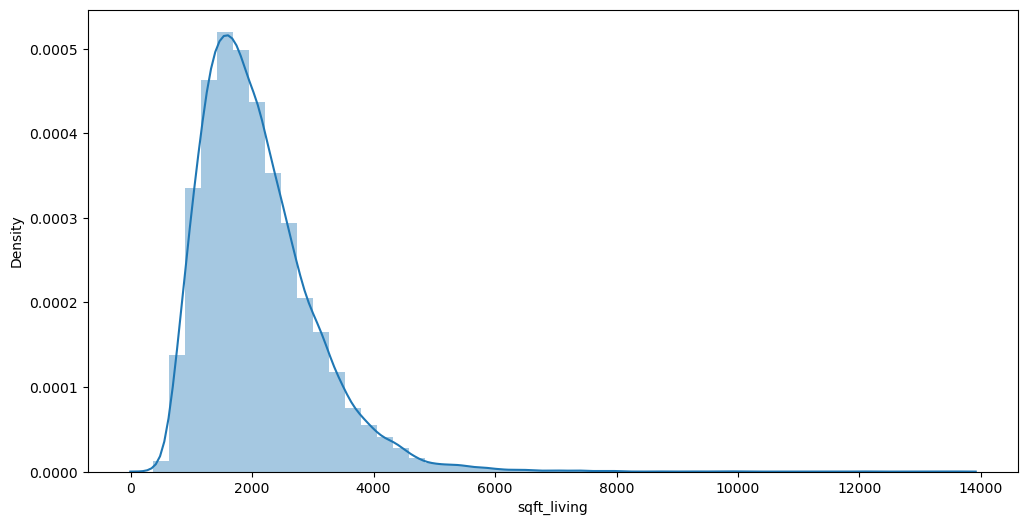

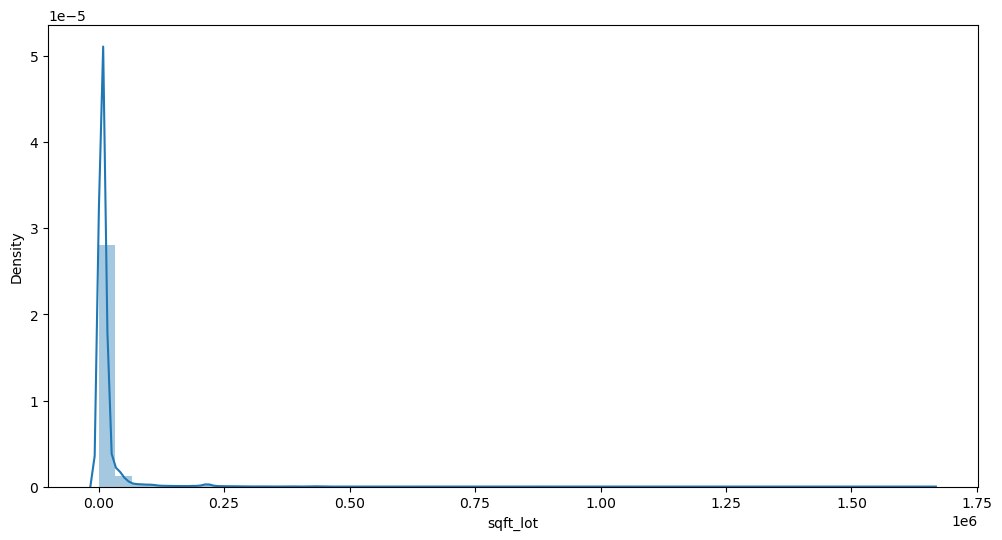

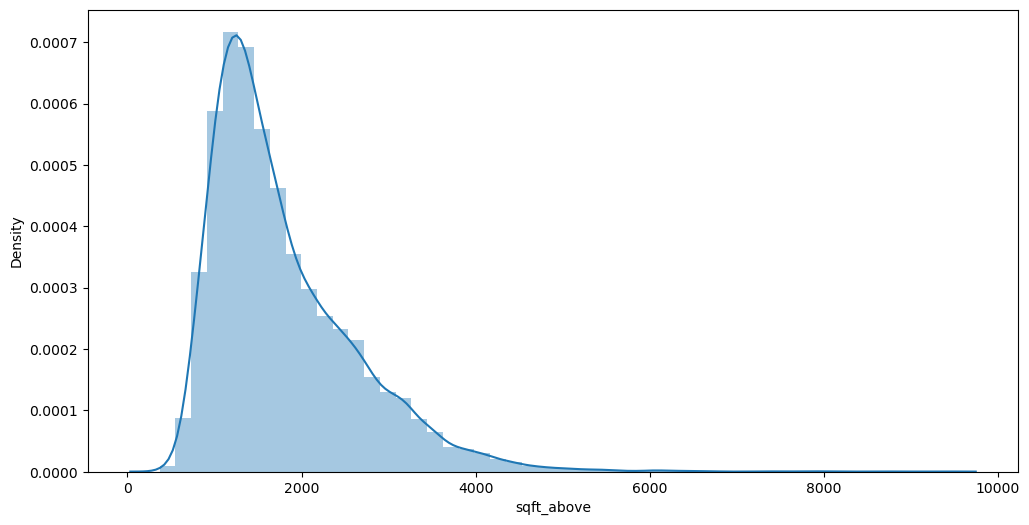

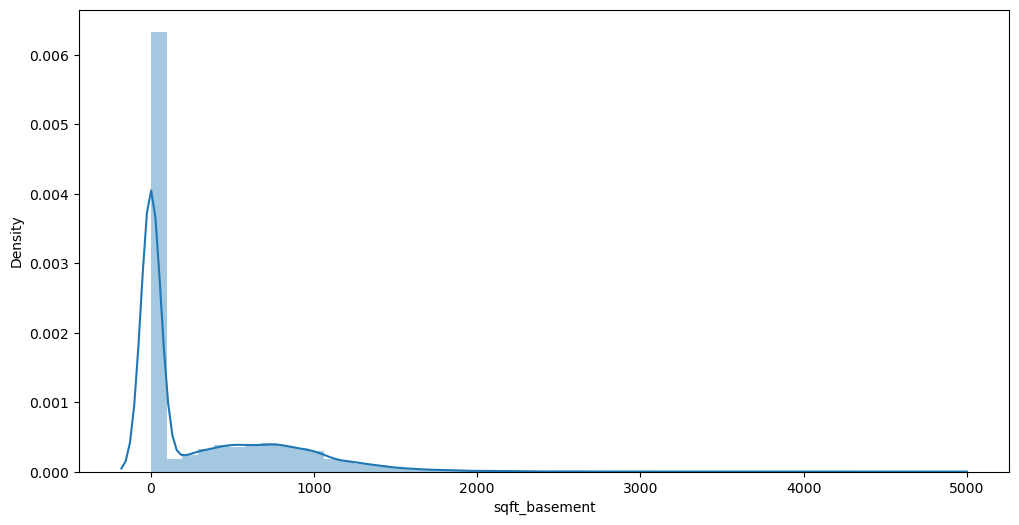

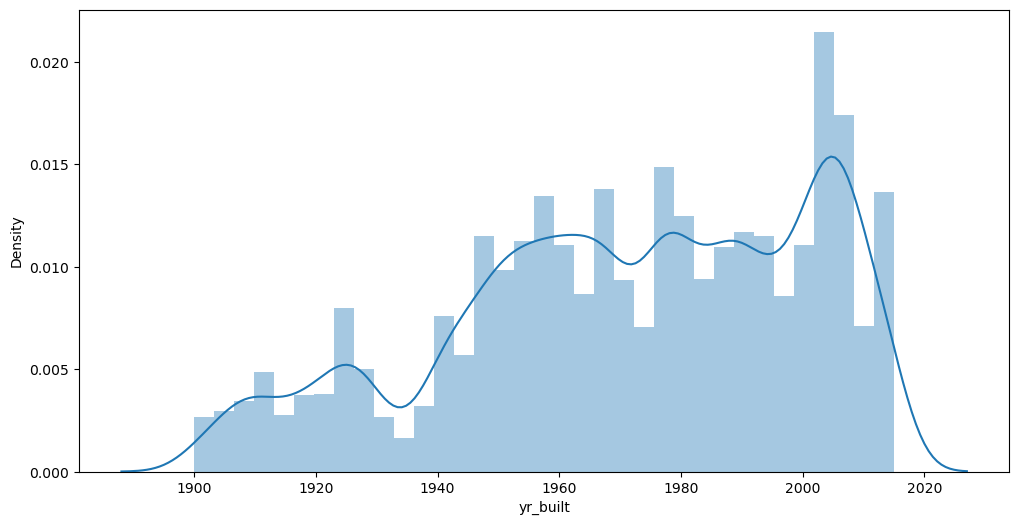

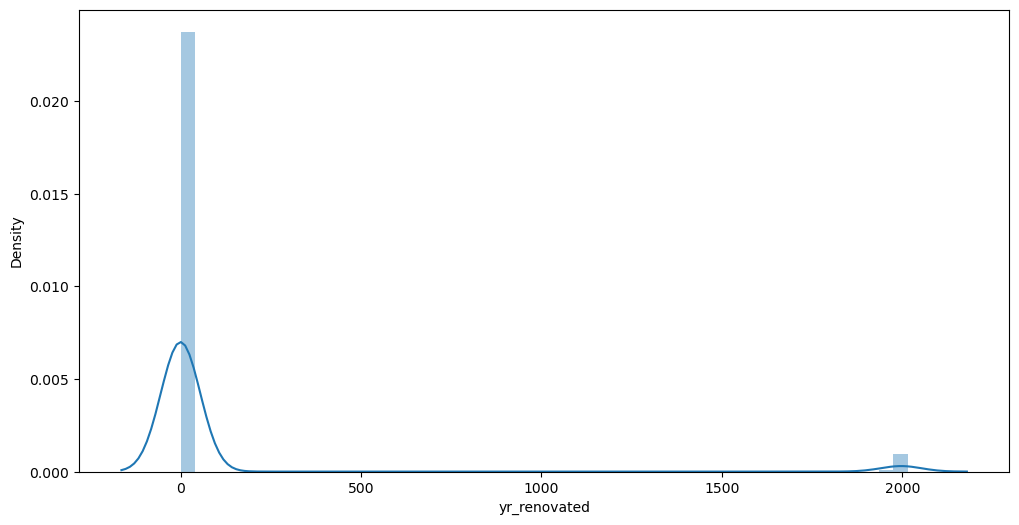

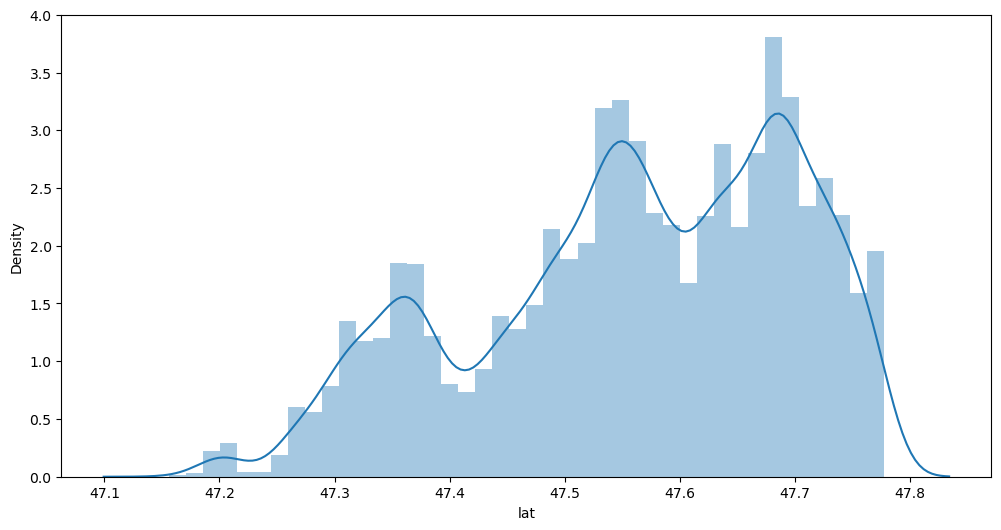

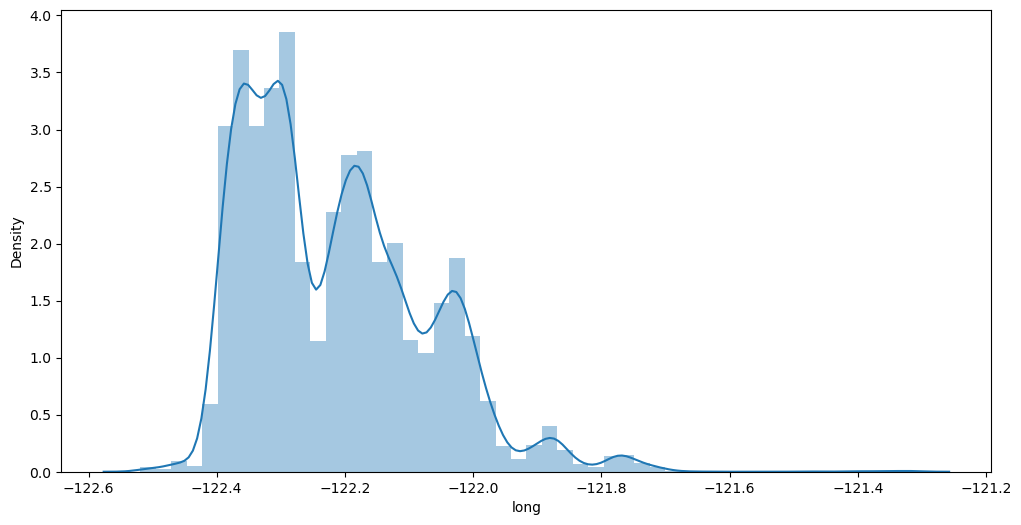

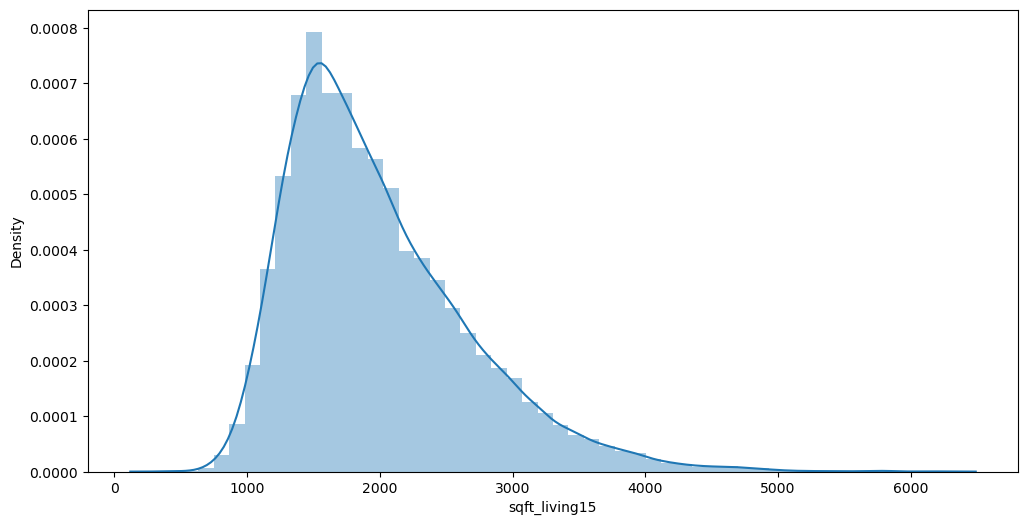

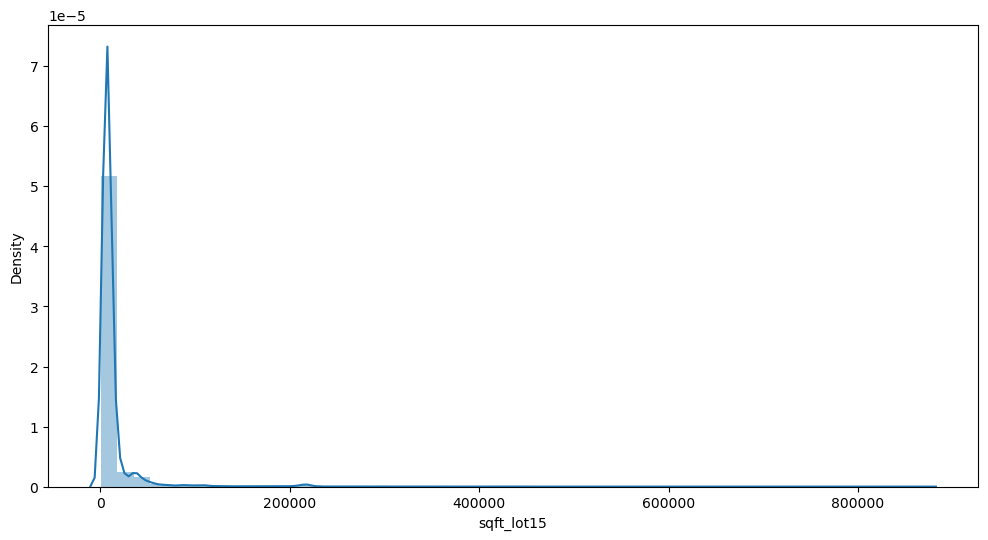

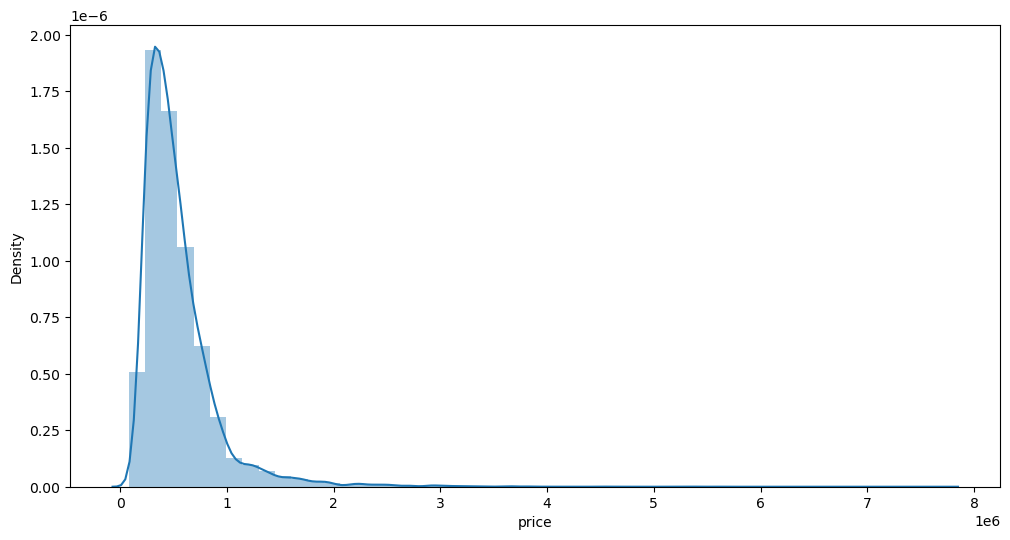

In [11]:
#Checking distribution for the numerical columns
for col in num_df.columns:
    fig =plt.figure(figsize=(12,6))
    sns.distplot(num_df[col], hist=True)
    plt.show()

#### Insights
- The columns that represent Sqft skew to the right which is normal when considering that some houses will be bigger, canadate for log scaling or normalisation, apart from sqft_basement which has a lot of zeros meaning a lot of houses dont have basements.
- The target feature price also sees a skew to the right which is normal with monetary values.
- Rest are normal considering represtation.


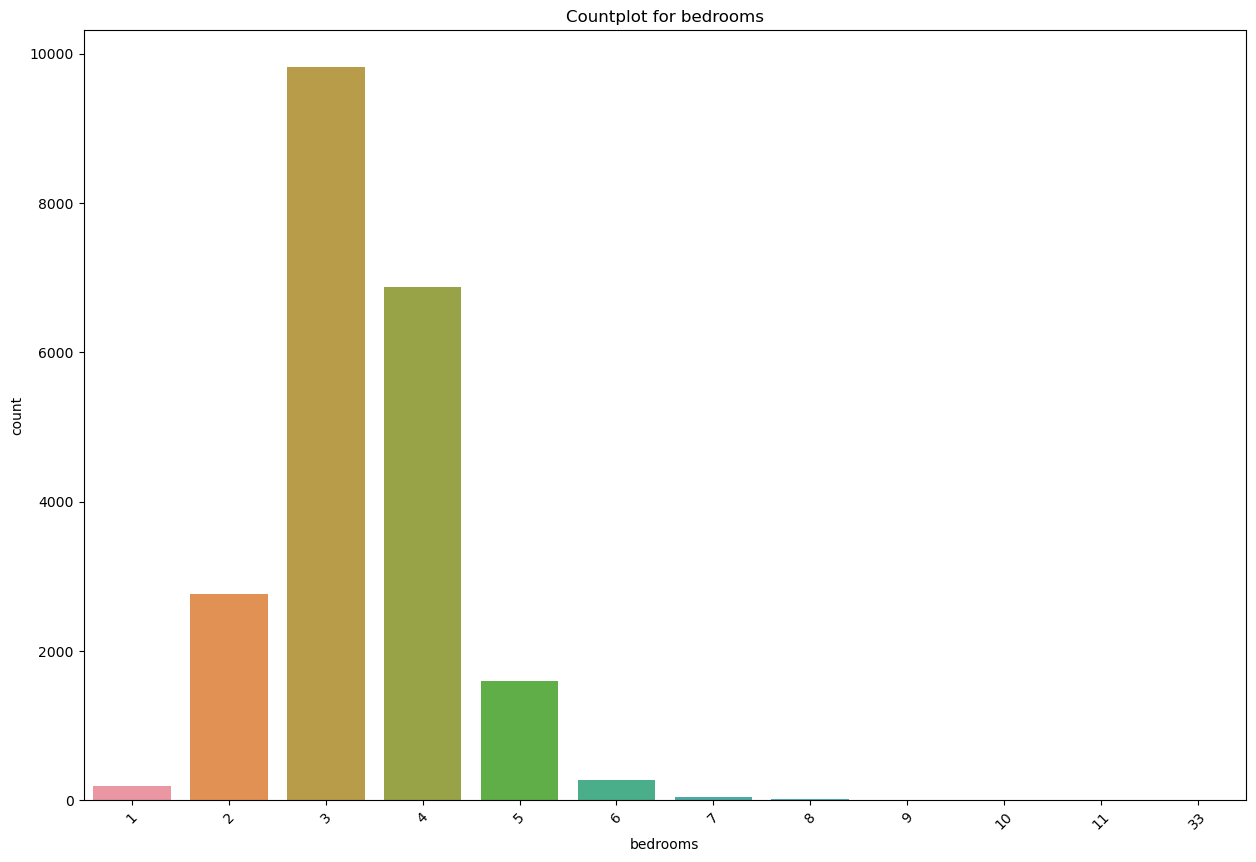

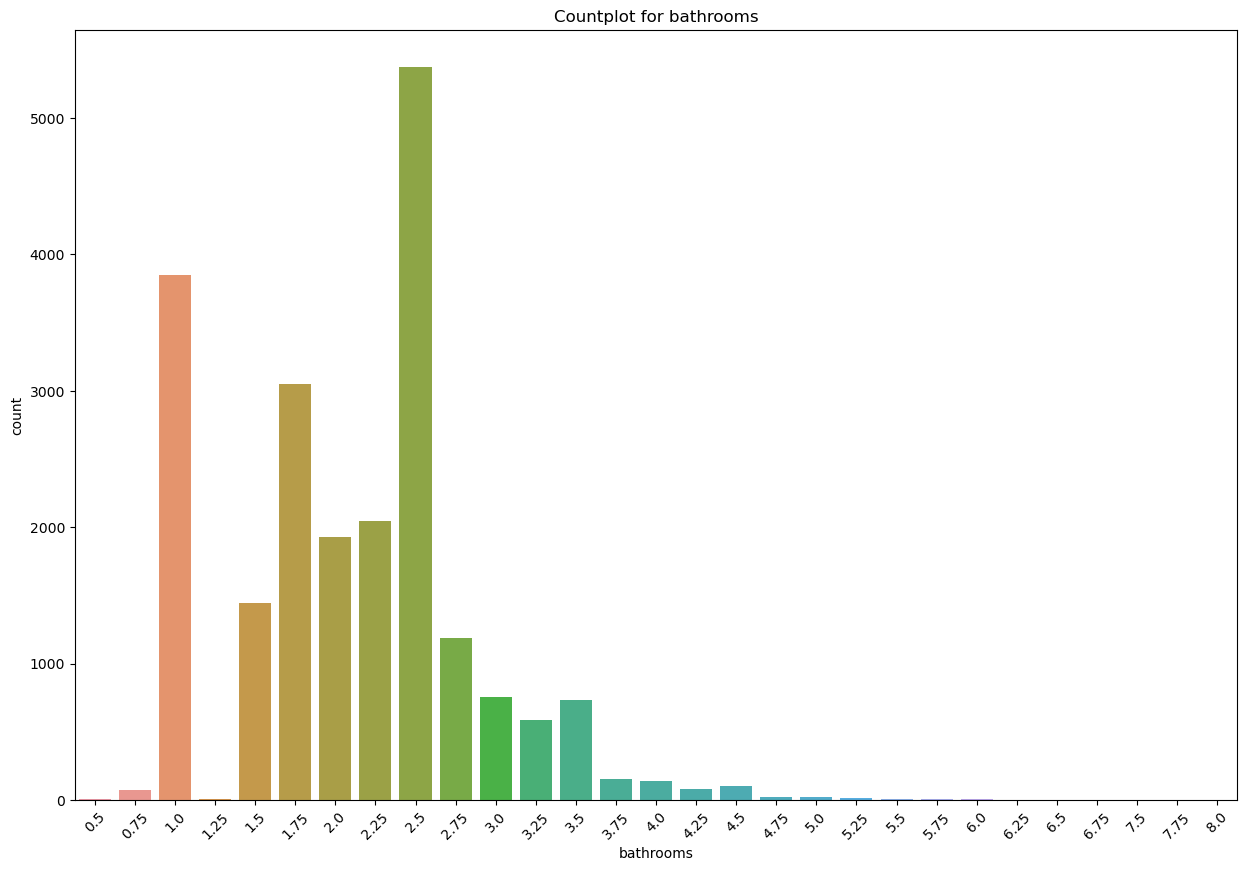

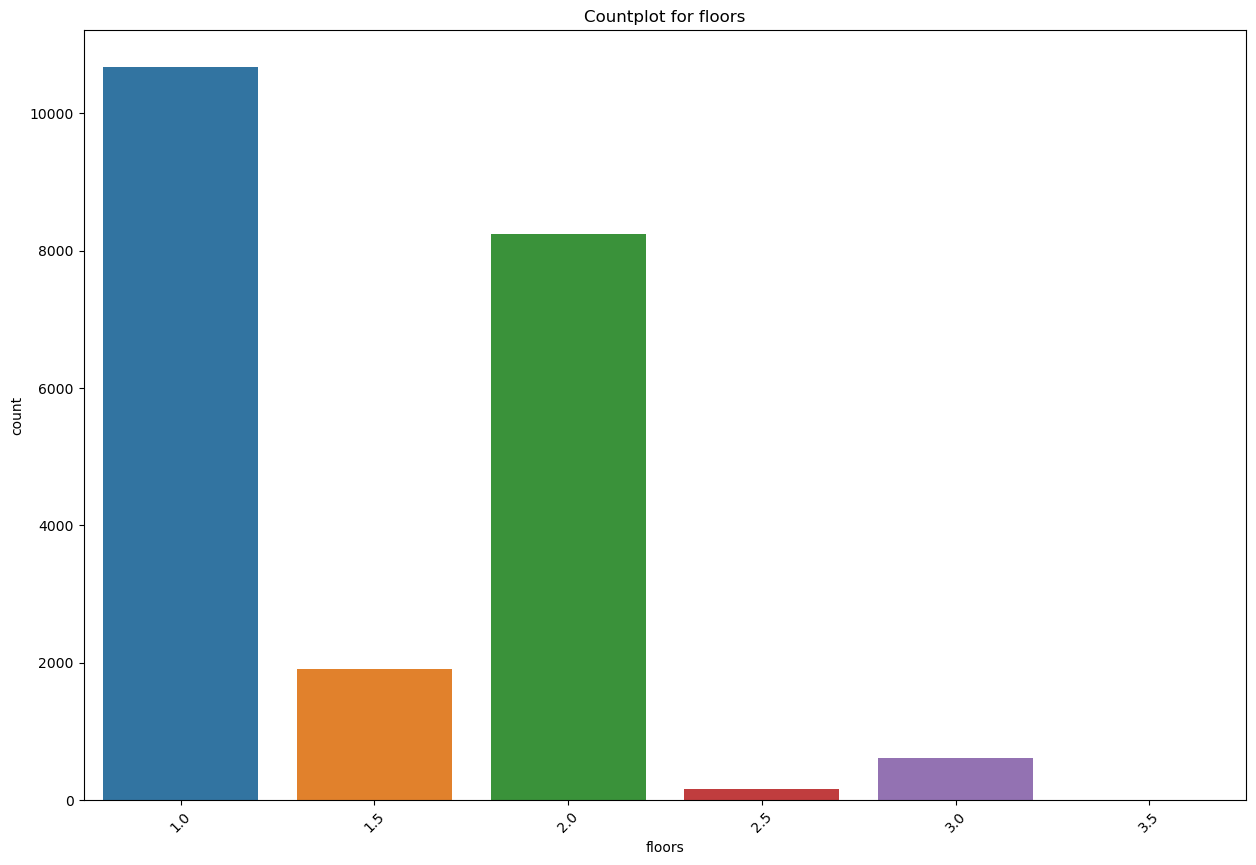

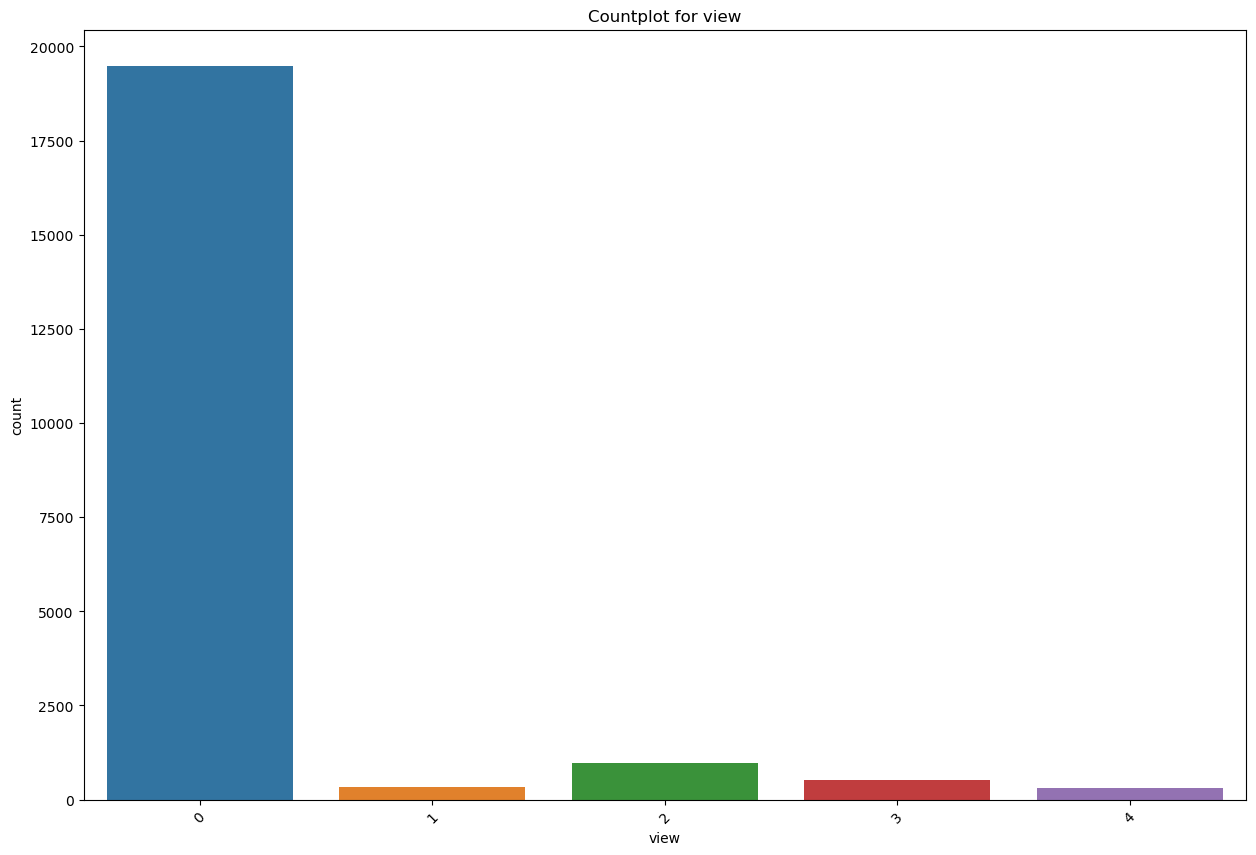

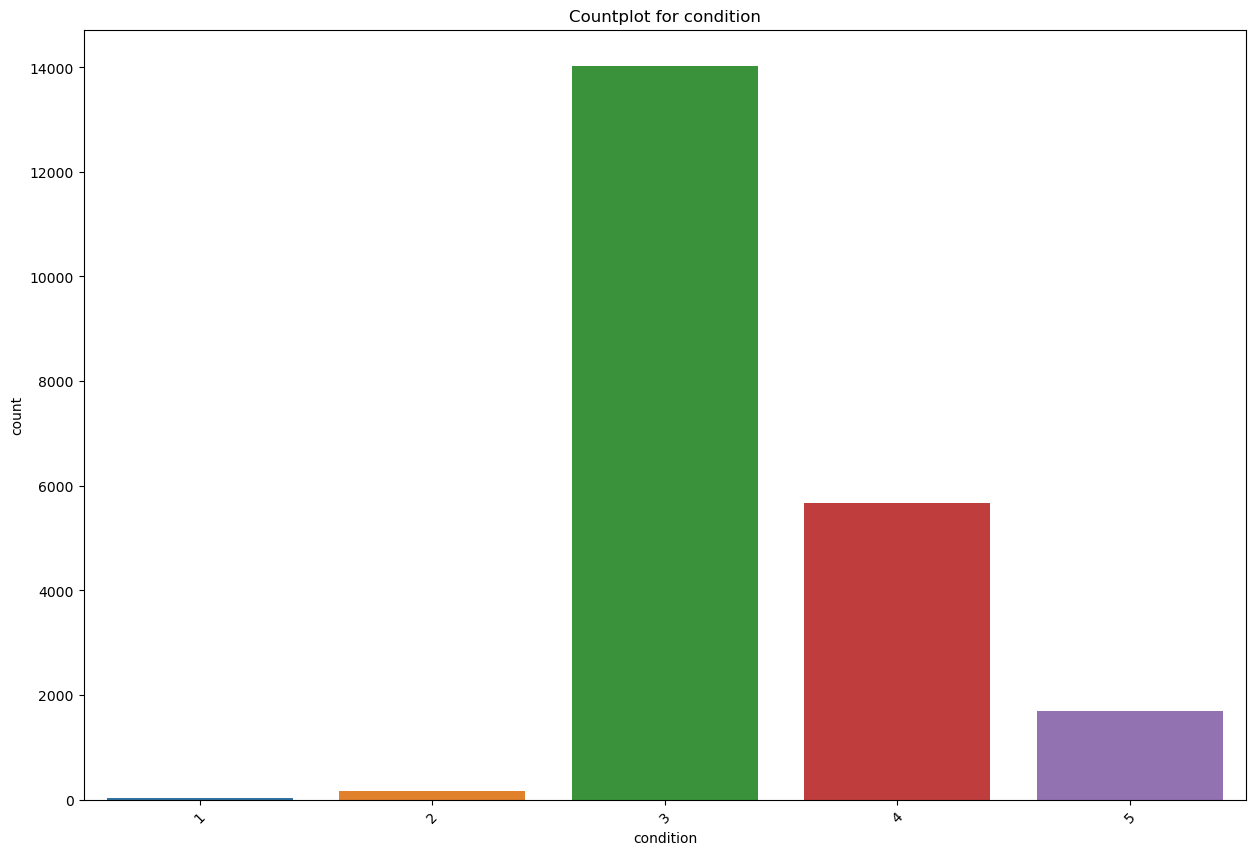

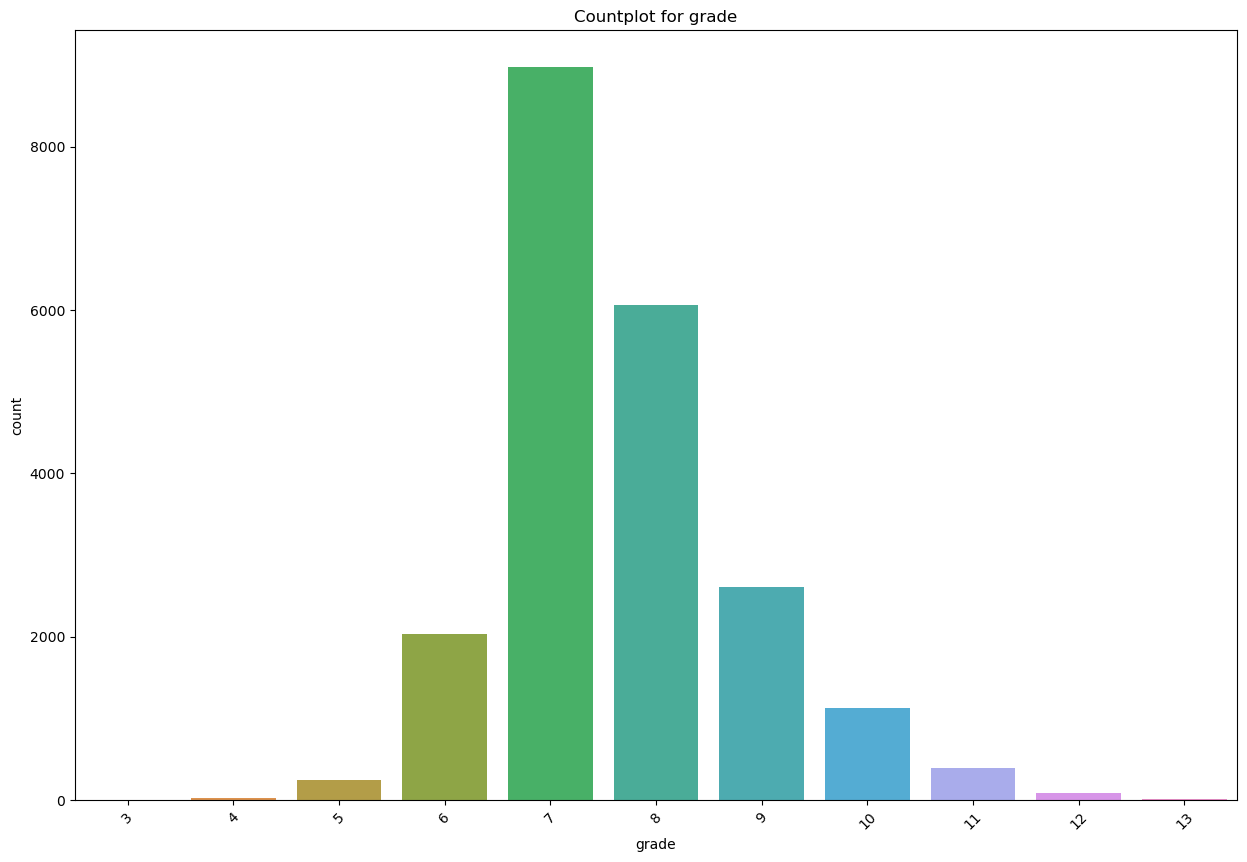

In [12]:
# Plotting the categorical
# variable is used to excudle the zipcode graph as it is unreadabl

cat_nozip = cat_df.columns[:-1]

for col in cat_nozip:
    plt.figure(figsize=(15, 10))
    plt.xticks(fontsize=10)
    plt.title(f'Countplot for {col}')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.xticks(rotation = 45)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    sorted_df = df.sort_values(by=col)
    sns.countplot(x=col, data=df)
    
    plt.show()

#### Insights
- 3 or 4 bedroom houses are the avg sold.
- Interesting to see the different characteristics of the avg house in our dataset. 

## 2.2 EDA (Correlation)


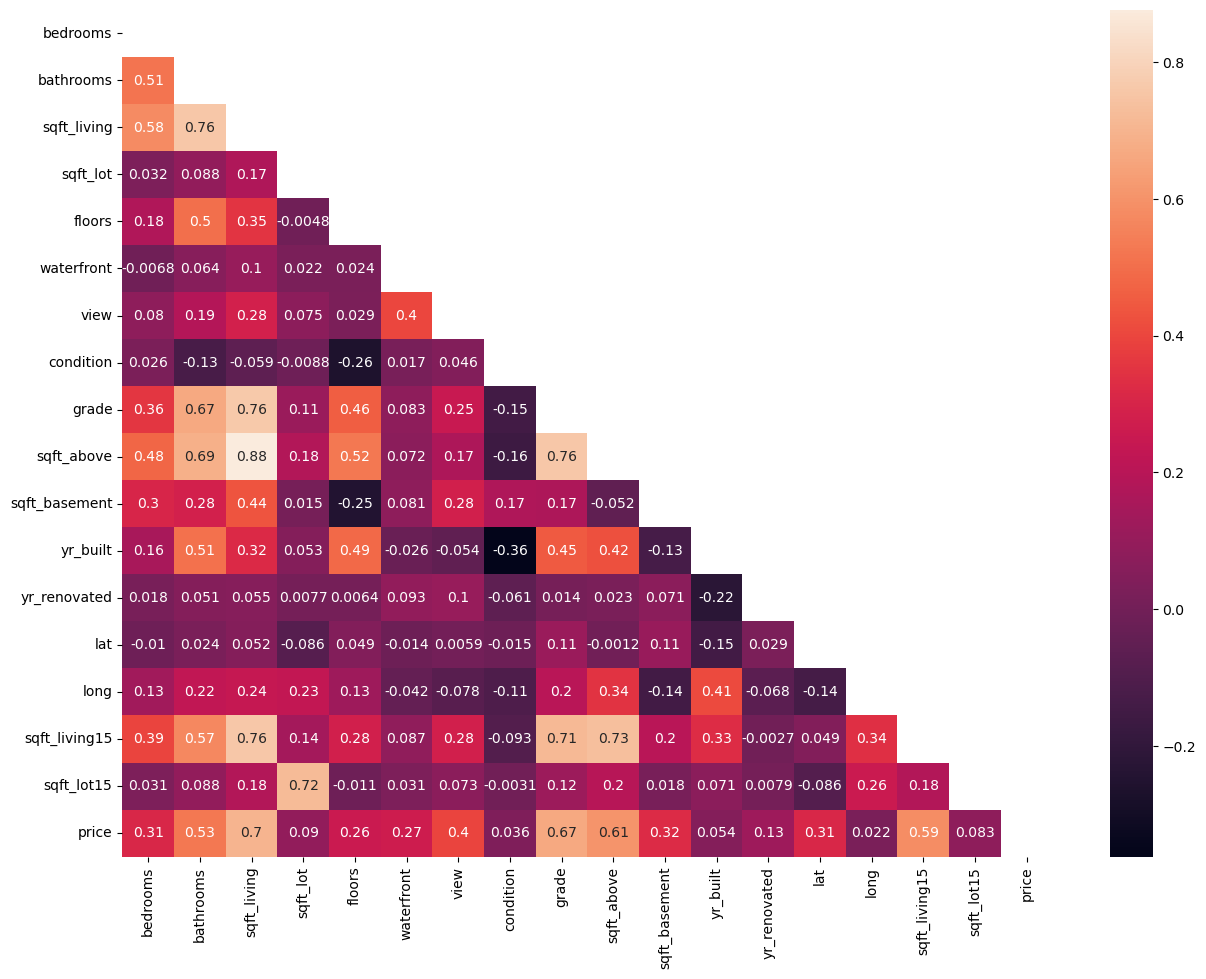

In [13]:
# Correlation Matrix 
corr_matrix = df.corr(method= 'pearson')

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize = (15,11))
ax = sns.heatmap(corr_matrix, mask = mask, annot = True)
plt.show()

#### Results of matrix.
- Sqft_above and sqft_living show a very high correlation of 0.88. This makes sense when you think they are essentially the same info with sqft_above refering to the sqft of the house apart of the basement and sqft_living refering to above + basement.
- With this observation Sqft_above and Sqft_basement can be dropped and the same info still present in pur data.
- Considering the high correlation between sqft_lot15 and sqft_lot, sqft_living15, sqft_living and there similar meanings seeing if we can drop one of each will be looked into. 

In [14]:
sqft_drop = ['sqft_above', 'sqft_basement']
df = df.drop(sqft_drop , axis=1,)
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,False,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650,221900
6414100192,3,2.25,2570,7242,2.0,False,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639,538000
5631500400,2,1.00,770,10000,1.0,False,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062,180000
2487200875,4,3.00,1960,5000,1.0,False,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000,604000
1954400510,3,2.00,1680,8080,1.0,False,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,False,0,3,8,2009,0,98103,47.6993,-122.346,1530,1509,360000
6600060120,4,2.50,2310,5813,2.0,False,0,3,8,2014,0,98146,47.5107,-122.362,1830,7200,400000
1523300141,2,0.75,1020,1350,2.0,False,0,3,7,2009,0,98144,47.5944,-122.299,1020,2007,402101


## 2.3 EDA (Outliers)
- with dealing with the housing market there is bound to be a fair share of outliers in our dataset.

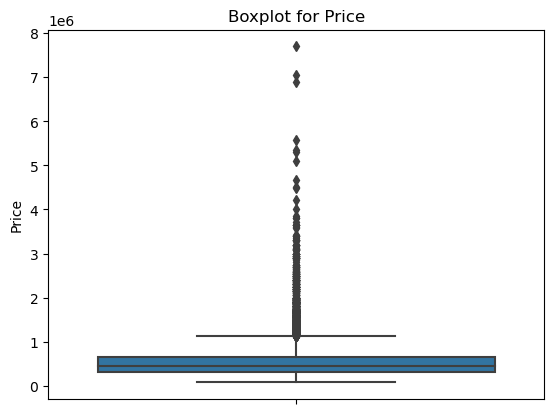

In [15]:
# First checking outliers with our target feature 'price'
sns.boxplot(y='price', data=df, orient='v')

plt.title('Boxplot for Price')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()




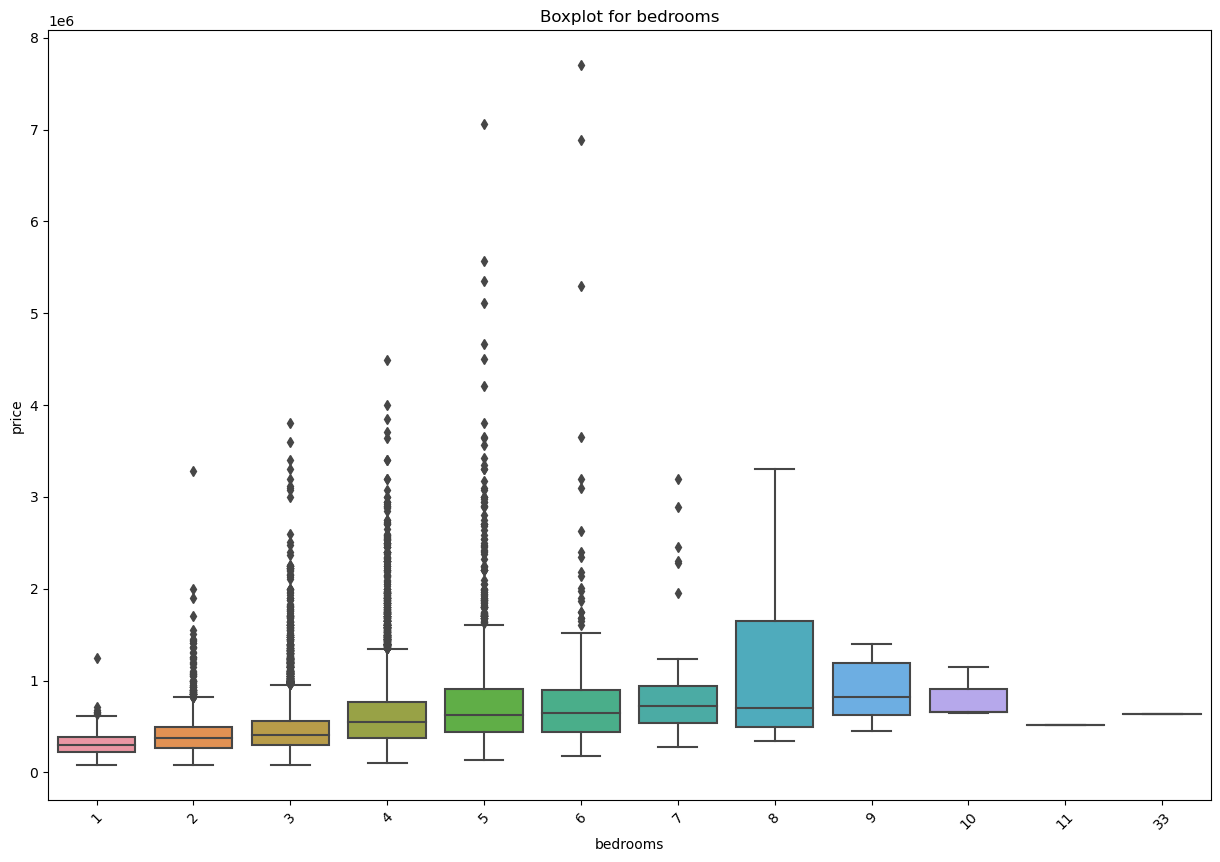

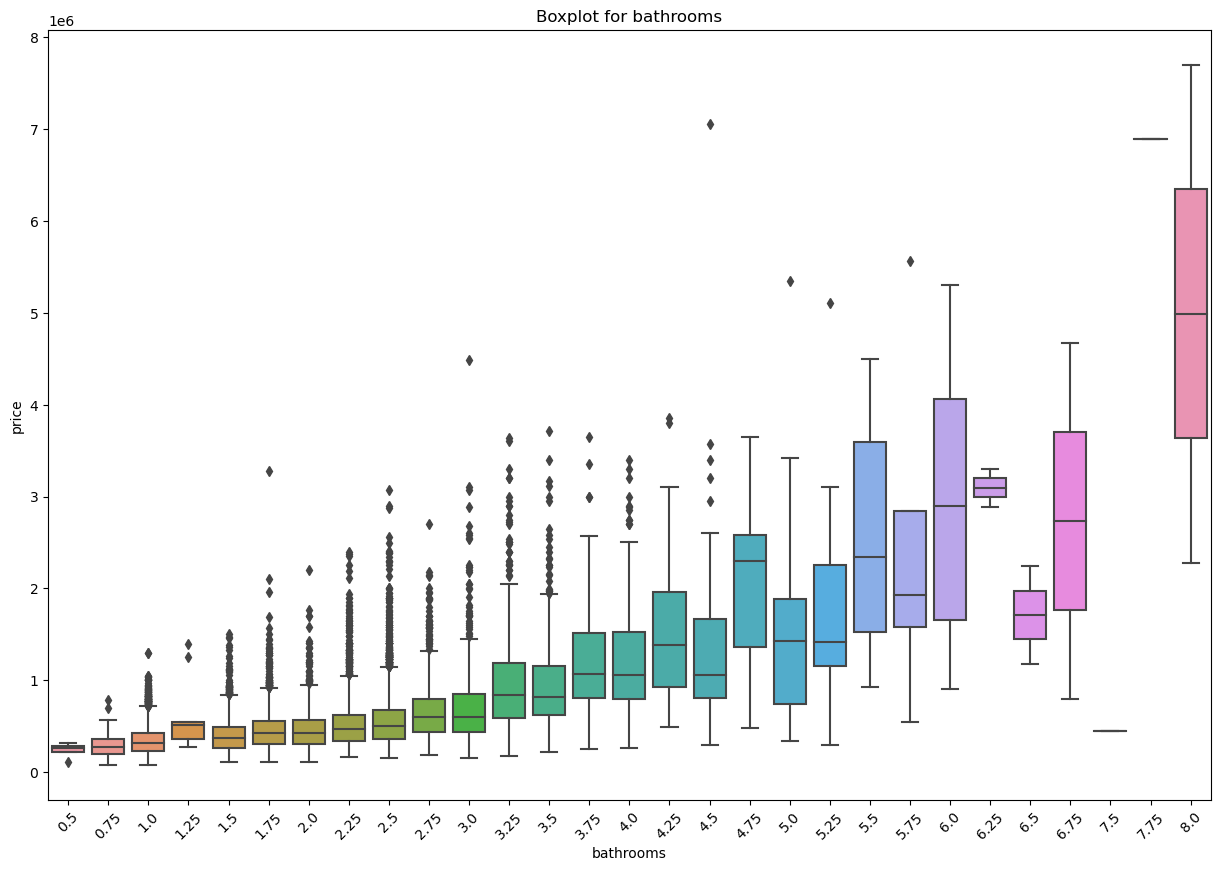

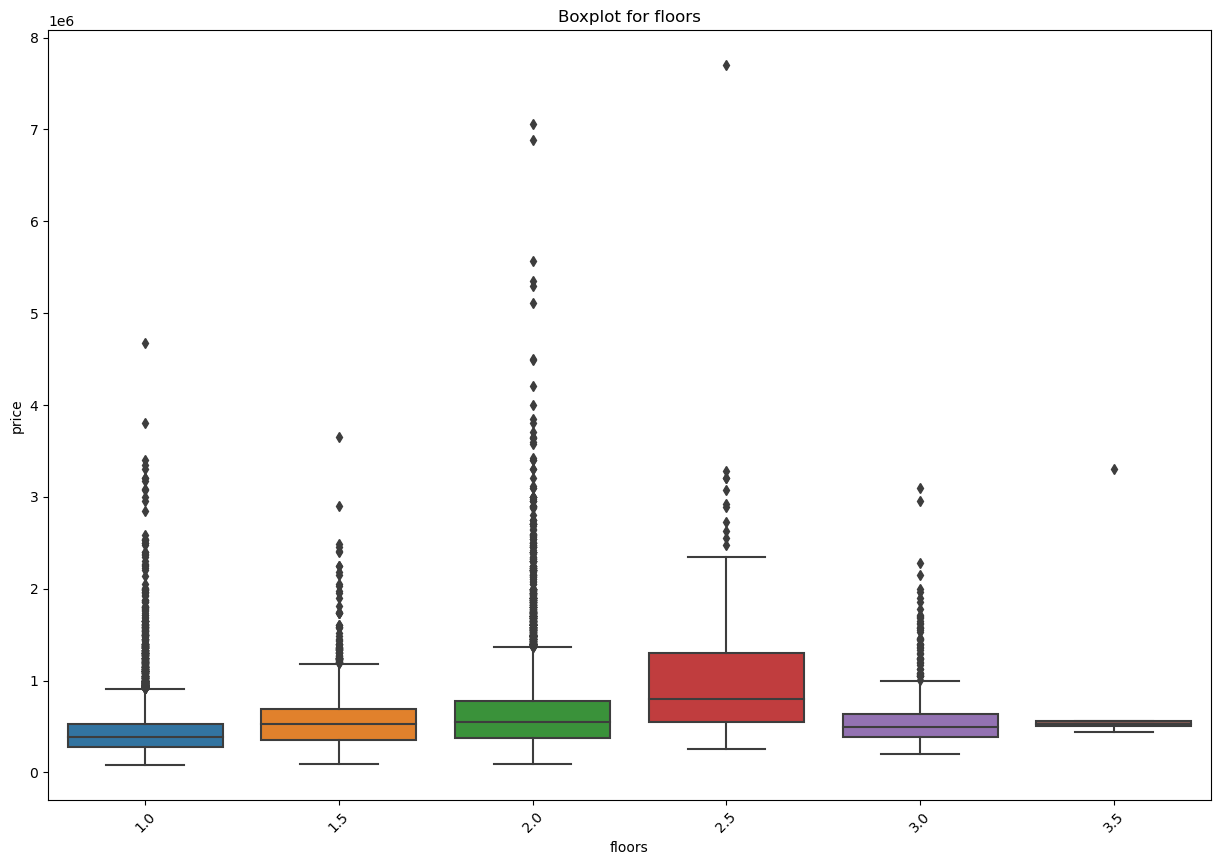

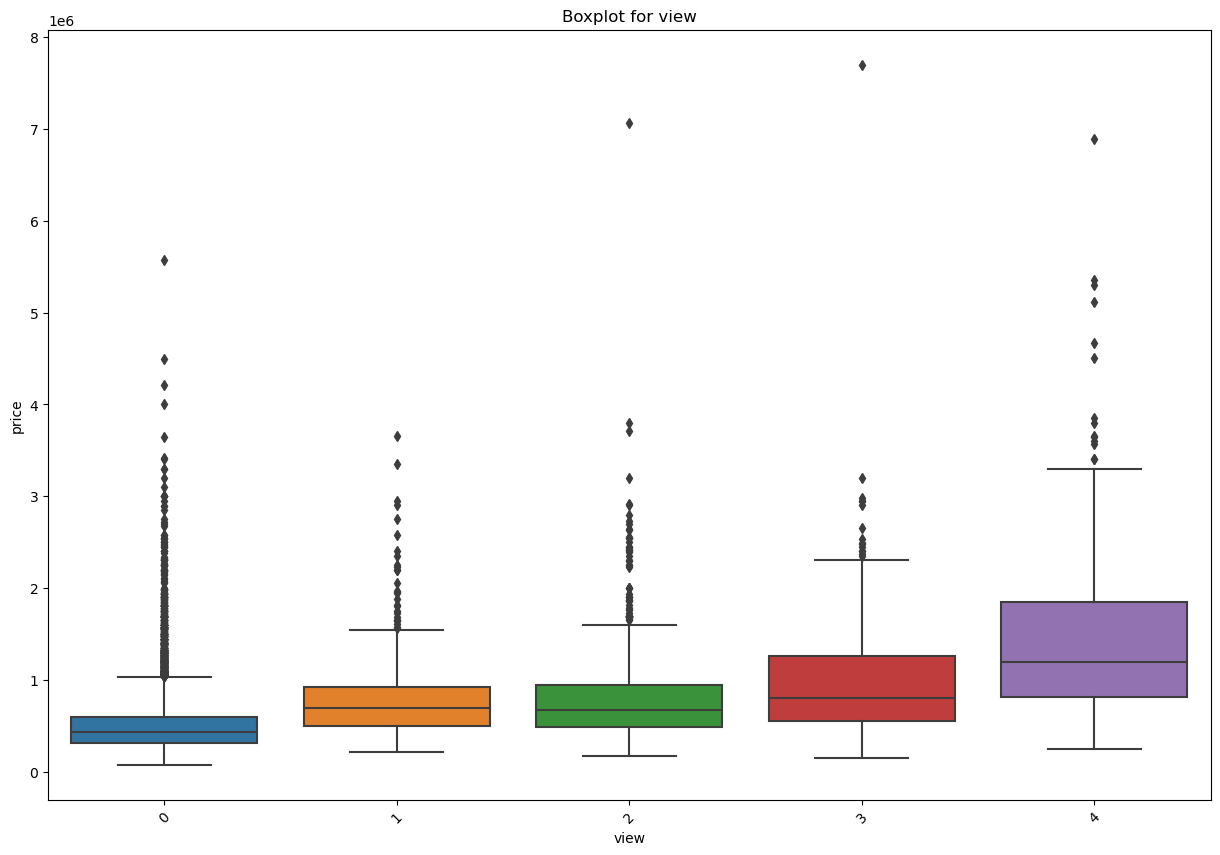

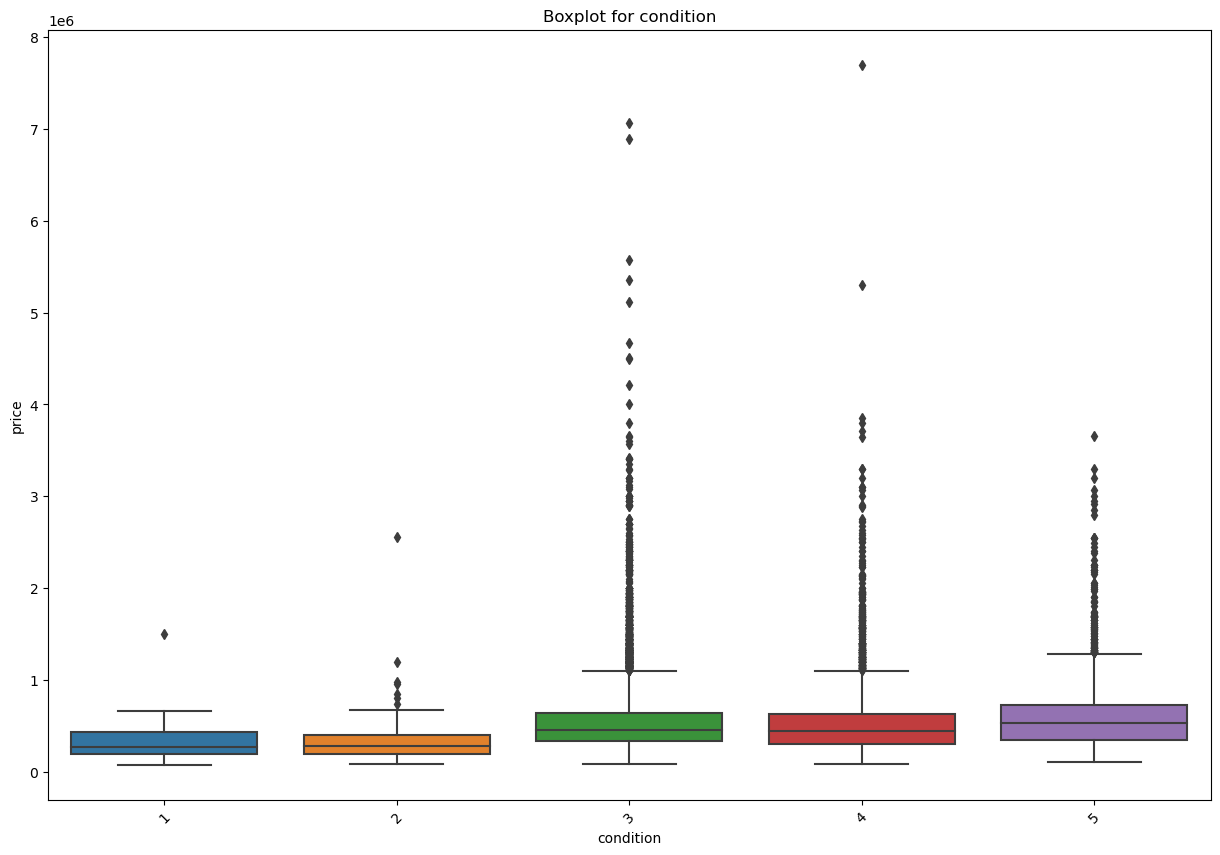

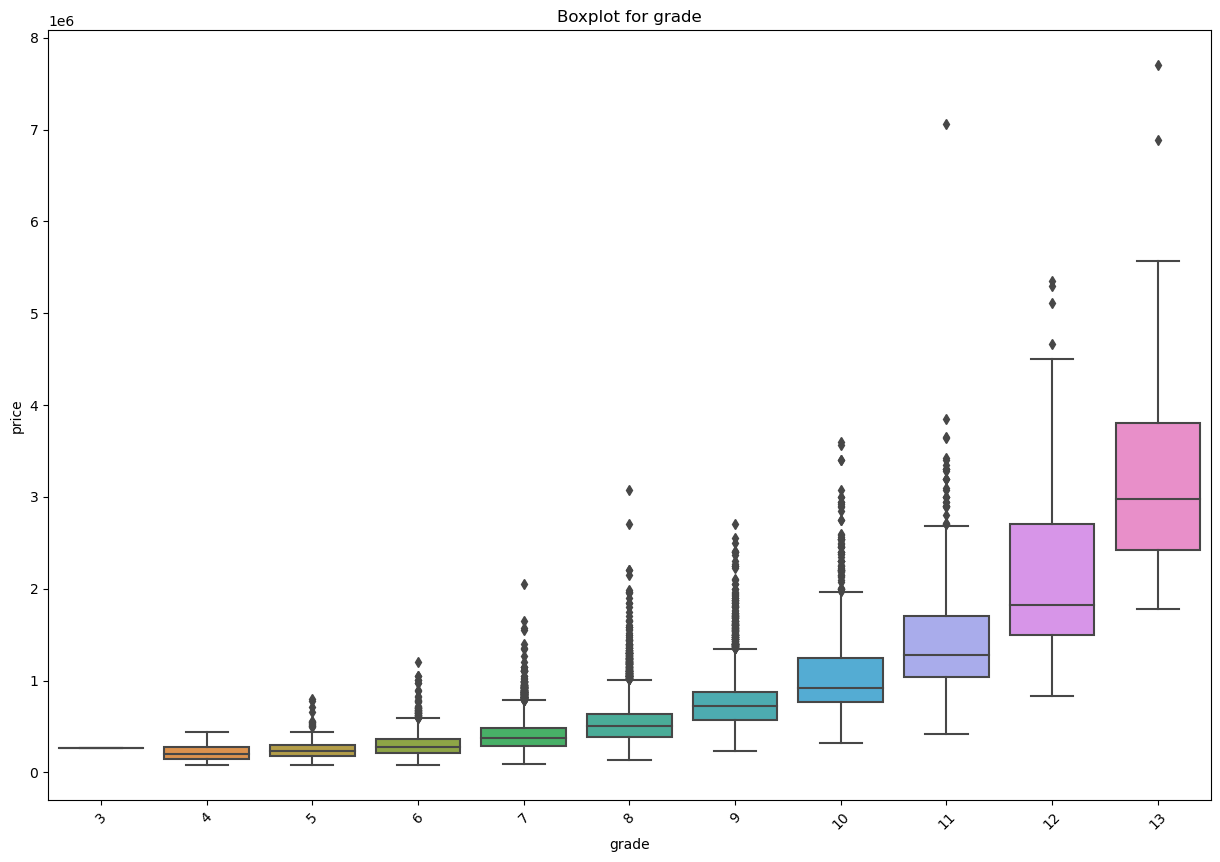

In [16]:
# Catergorical Columns
# cat_nozip is used again to ignore zipcode column.


for col in cat_nozip:
    plt.figure(figsize=(15, 10))
    plt.xticks(fontsize=10)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.xticks(rotation = 45)
    sns.boxplot(x=col, y='price', data =df)
    plt.show()

In [17]:
## Numerical columns.
df.describe()
    

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.234292,3.409825,7.657915,1970.999676,84.464787,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.766390,0.650546,1.173200,29.375234,401.821438,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [18]:
# redfining num_df after drop sqft_above and sqft_basement.
num_df = df.select_dtypes(include='number')
for col in num_df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    print(f'Outliers in {col}: {num_outliers} outliers')


Outliers in bedrooms: 530 outliers
Outliers in bathrooms: 561 outliers
Outliers in sqft_living: 571 outliers
Outliers in sqft_lot: 2419 outliers
Outliers in floors: 0 outliers
Outliers in view: 2122 outliers
Outliers in condition: 29 outliers
Outliers in grade: 1905 outliers
Outliers in yr_built: 0 outliers
Outliers in yr_renovated: 914 outliers
Outliers in lat: 2 outliers
Outliers in long: 255 outliers
Outliers in sqft_living15: 543 outliers
Outliers in sqft_lot15: 2188 outliers
Outliers in price: 1158 outliers


#### Insights
- As we can see we have a far amount of outliers across the board which is normal when considering the many factors affecting our features.
- I think removing outliers in our model may be a bad idea as we will always have outliers in a housing market but scaling may help our model.

### Here is a good point to get out benchmark models before we deep dive further.

Model: LinearRegression
R2_score: 0.79
RMSE: 173405.3
MAE: 96797.02
MAPE: 19.73 %



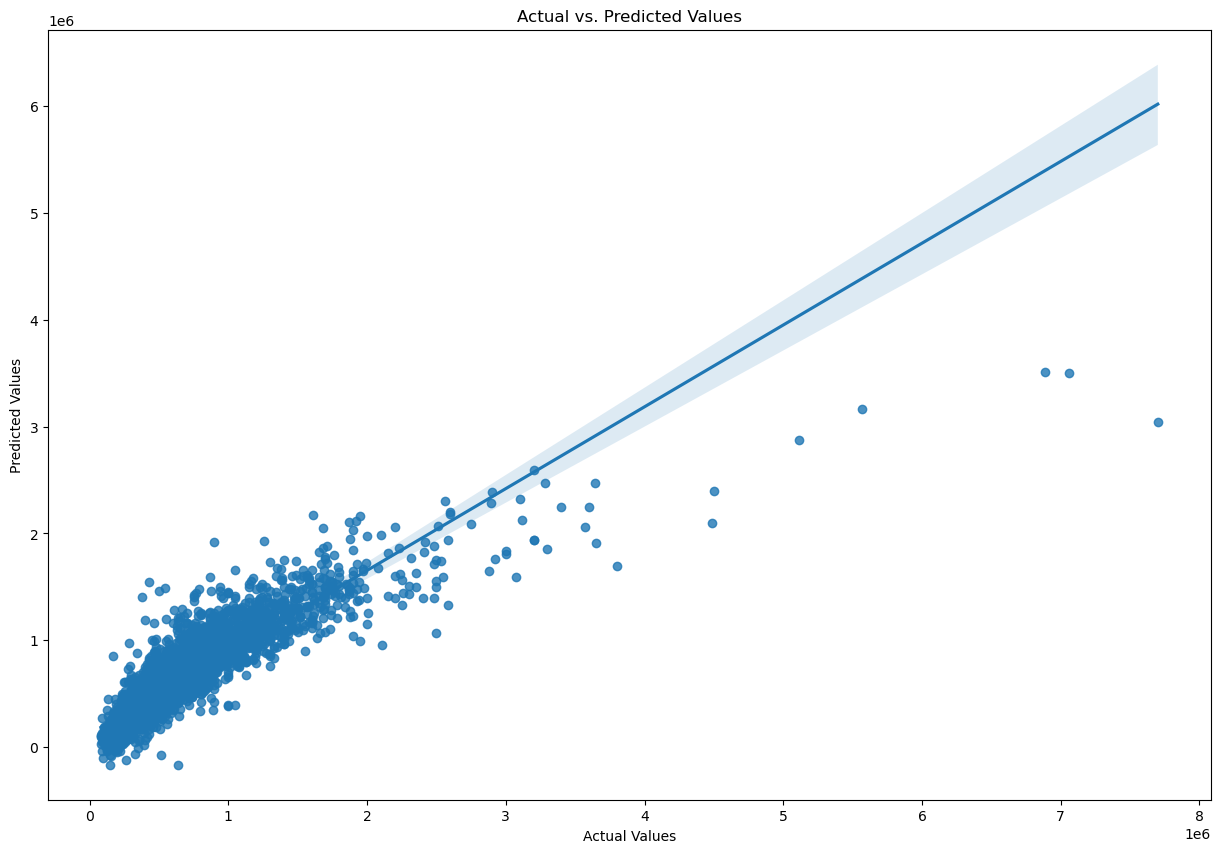

Model: KNeighborsRegressor
R2_score: 0.41
RMSE: 287991.97
MAE: 165359.57
MAPE: 33.15 %



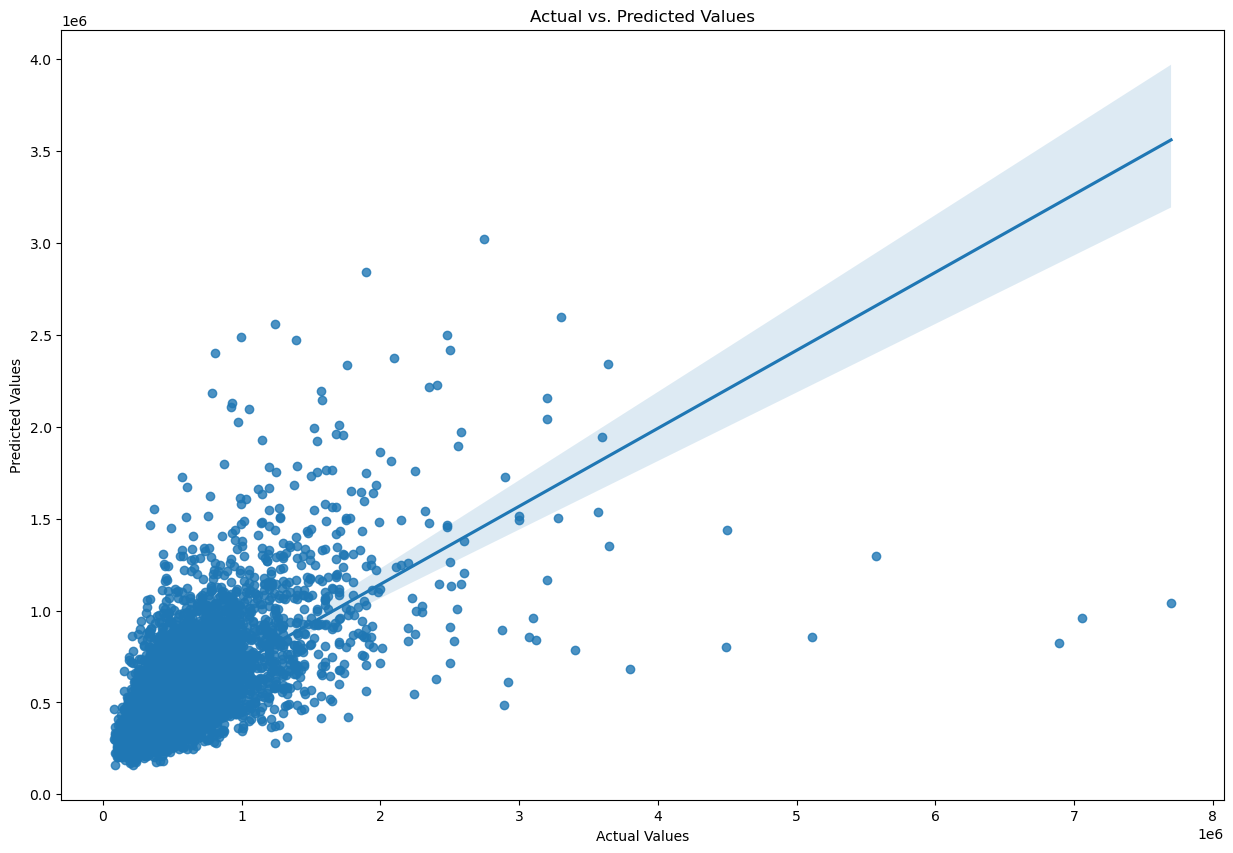

Model: MLPRegressor
R2_score: 0.51
RMSE: 262531.67
MAE: 169809.17
MAPE: 35.26 %



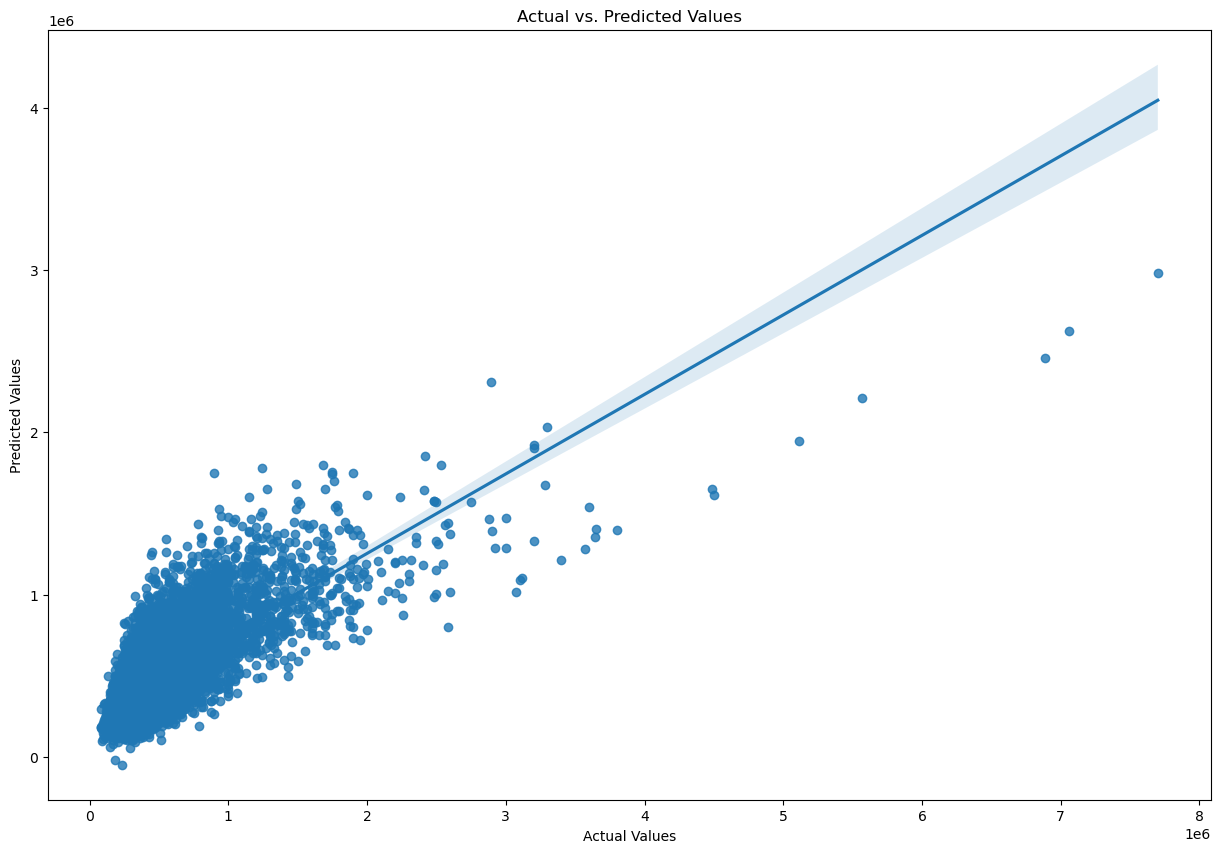

In [19]:
reg_models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor(), ]

X = pd.get_dummies(df.drop('price', axis=1))
y = df['price']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)


def regression_model(models, data):
    for model in models:
        plt.figure(figsize=(15, 10))
        plt.xticks(fontsize=10)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        score = model.score(X_test, y_test)
        rmse = mean_squared_error(y_test, pred, squared=False)
        mae = mean_absolute_error(y_test, pred)
        mape = mean_absolute_percentage_error(y_test, pred) * 100
        print("Model:", model.__class__.__name__)
        print("R2_score:", round(score, 2))
        print("RMSE:", round(rmse, 2))
        print("MAE:", round(mae, 2))
        print("MAPE:", round(mape, 2), "%")
        print()

        # Scatter plot of actual vs. predicted values
        sns.regplot(x=y_test, y=pred)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual vs. Predicted Values')
        plt.show()


regression_model(reg_models, df)


#### Results
- So far our data is best fit for LinearRegression with an R2 of 0.79 and the worst is KNeighboursRegressor with an R2 score of 0.45.
- But our Rmse and mae of our best model is quite high 163,649 and 97,348 respectively.
- Our plots show the effect of outliers on our model.

## 3: Feature Engineering and Selection
- Looking at Sqft living/lot V sqft living15/lot15 to see differences and maybe dropping
- yr_renovated change to yes or no?
- Scaling.
- Feature Importance. VIF

#### 3.1:  Sqft column analysis.
- Comparing sqft_living with sqft_living15 and sqft_lot with sqft_lot15.


In [20]:
#Create a series by comparing the values of each column and then representing the proportion as a percentage.
comparison_living = df['sqft_living15'] >= df['sqft_living']
comparison_living.value_counts(normalize=True) * 100

True     54.447377
False    45.552623
dtype: float64

In [21]:
comparison_living = df['sqft_lot'] >= df['sqft_lot15']
comparison_living.value_counts(normalize=True) * 100

True     60.503774
False    39.496226
dtype: float64

- The definition of these features implies renovations to the house this would mean usually the size gets bigger so I seen what percentage of each column this was true in. Now again not all renovations means the size increases but maybe an extra bath or bedroom is added so for the results to show over 50% and the high correlation shown, I think its okay to make the judgement to drop these columns based on containing similar info.

In [22]:

#sqft_drop = ['sqft_living', 'sqft_lot']
#df = df.drop(sqft_drop, axis = 1)

- After comparing the ML models with and without these columns we seen marginally better results including these columns so I will leave them in our final model.

#### 3.2: yr_renovated
- As most of our values for yr_renovated are 0 or not renovated i think this column would be better represented as Yes or No. So i will convert it into a boolean type.

In [23]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
# converting using lambda function where 0 is False and else is True.
df['yr_renovated'] = df['yr_renovated'].map(lambda x: False if x == 0 else True)


### 3.3: Scaling
- Two Methods of scaling will be tested for our model. Standard Scaler and log scaling.
- For log scaling it will not take the longitude column as it contains negative values so we will remove both lat and long columns.

#### Standard Scaler

Model: LinearRegression
R2_score: 0.69
RMSE: 210062.58
MAE: 124733.53
MAPE: 25.25 %



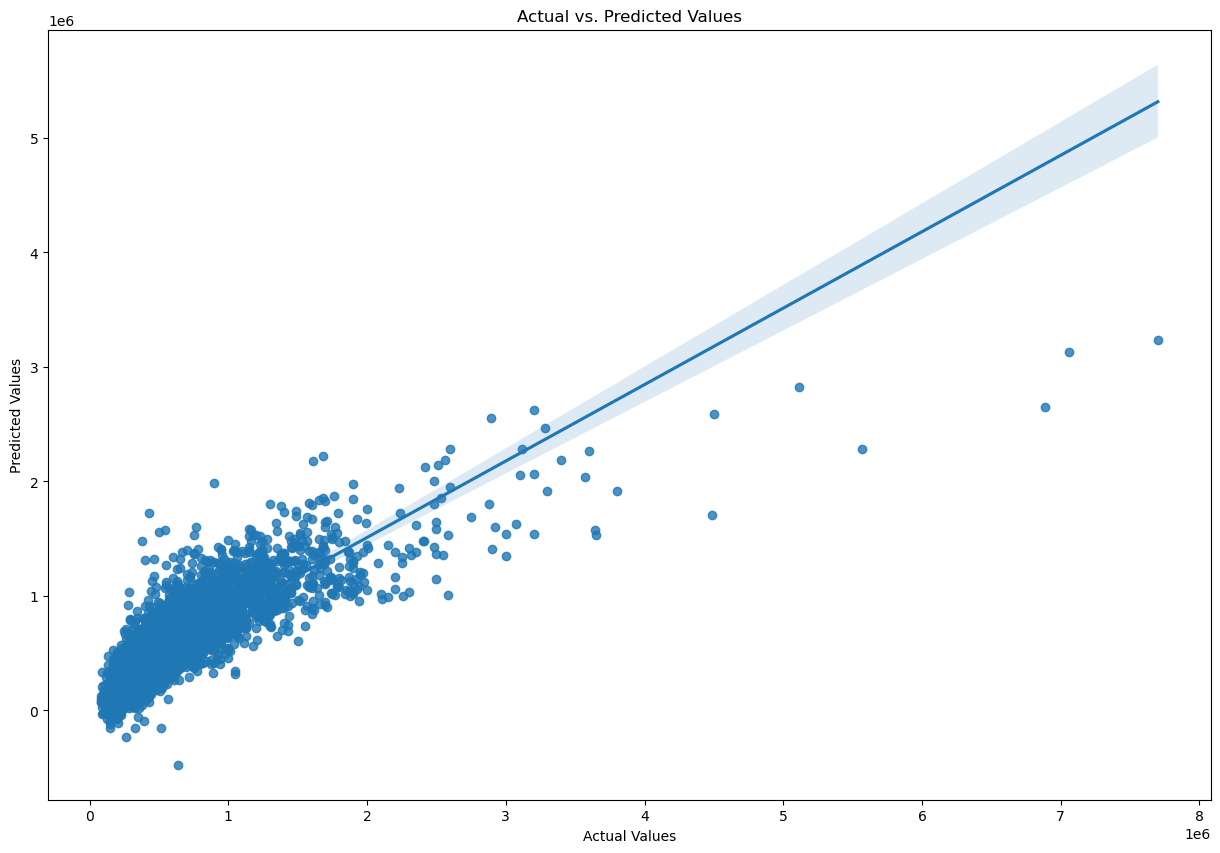

Model: KNeighborsRegressor
R2_score: 0.78
RMSE: 175845.04
MAE: 89662.53
MAPE: 16.52 %



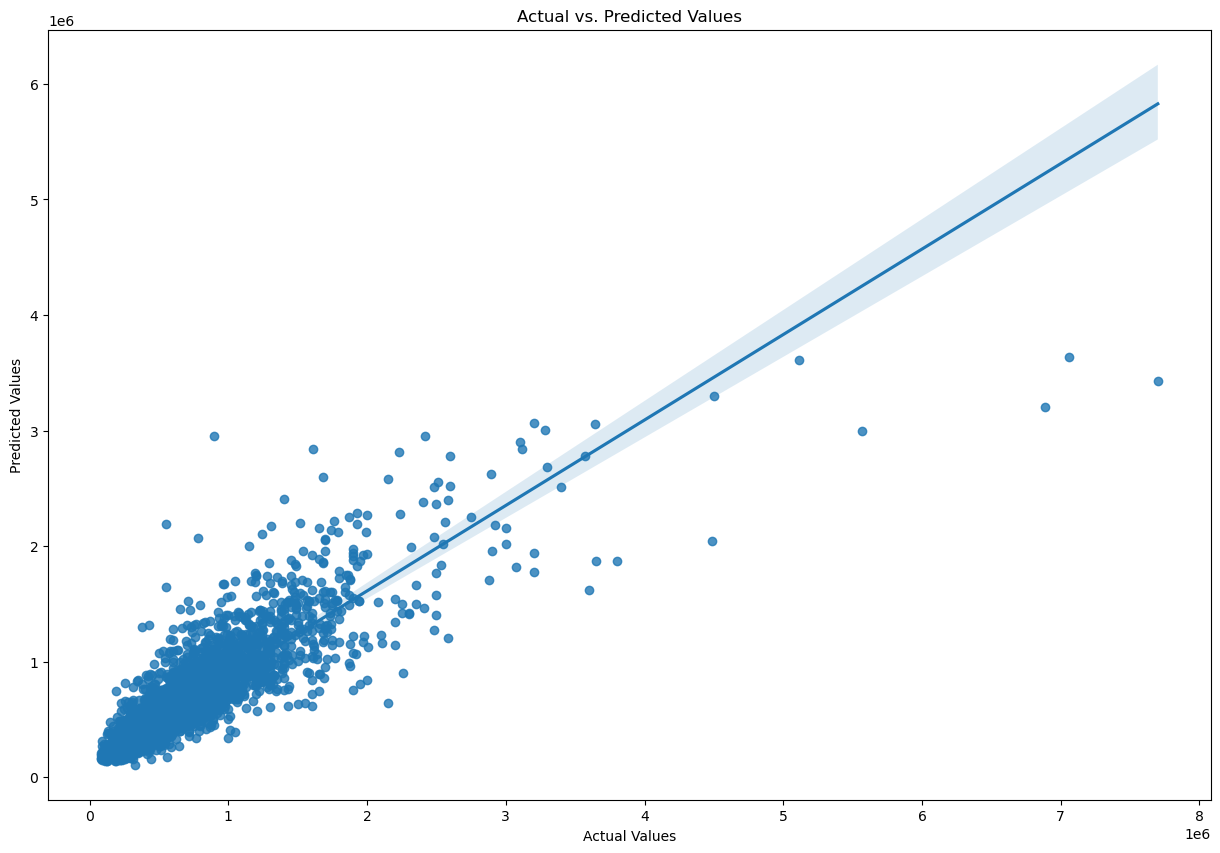

Model: MLPRegressor
R2_score: -1.44
RMSE: 585948.81
MAE: 477427.15
MAPE: 88.38 %



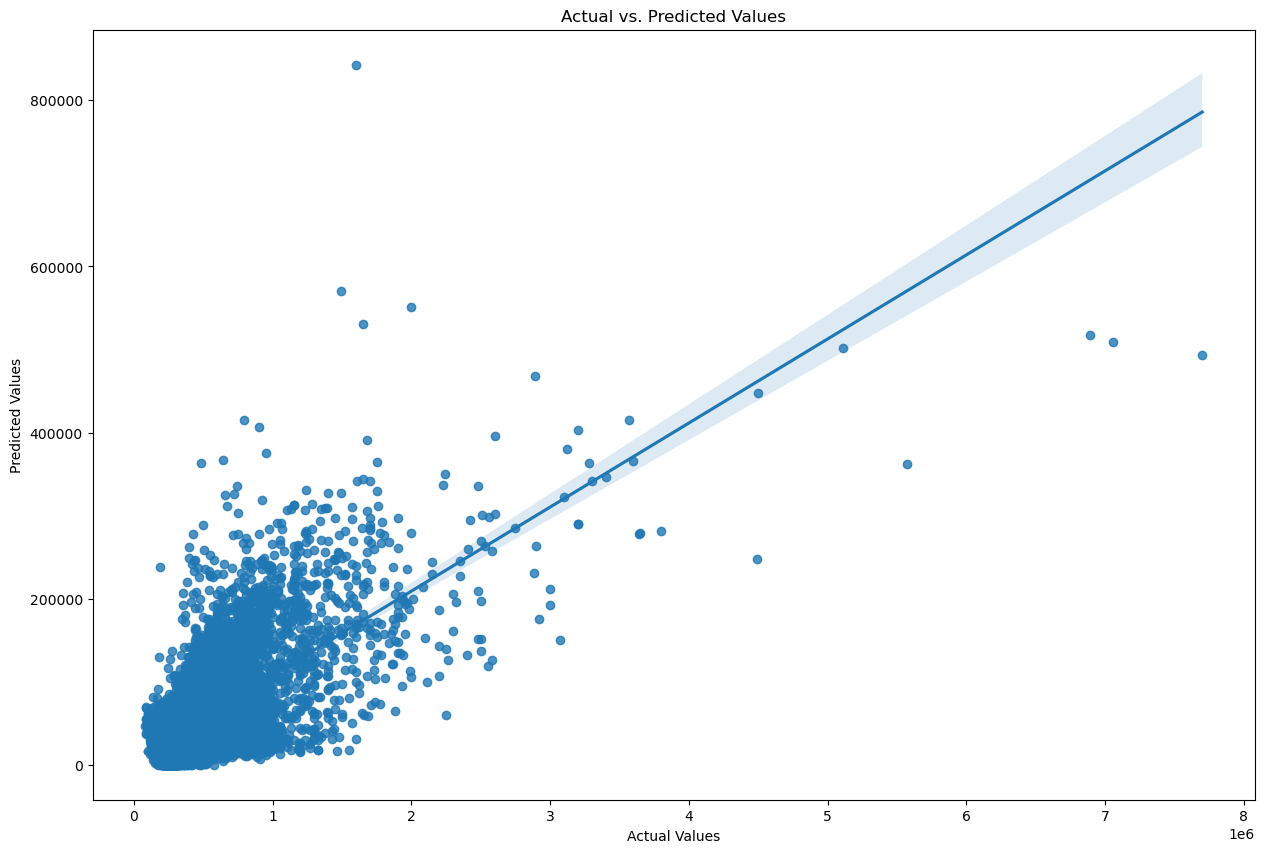

In [25]:
def regression_model_scaled (models, data):
    X = data.drop('price', axis=1)
    y = data['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for model in models:
        plt.figure(figsize=(15, 10))
        plt.xticks(fontsize=10)
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
        score = model.score(X_test_scaled, y_test)
        rmse = mean_squared_error(y_test, pred, squared=False)
        mae = mean_absolute_error(y_test, pred)
        mape = mean_absolute_percentage_error(y_test, pred) * 100
        print("Model:", model.__class__.__name__)
        print("R2_score:", round(score, 2))
        print("RMSE:", round(rmse, 2))
        print("MAE:", round(mae, 2))
        print("MAPE:", round(mape, 2), "%")
        
        print()

        # Scatter plot of actual vs. predicted values
        sns.regplot(x=y_test, y=pred)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual vs. Predicted Values')
        plt.show()

regression_model_scaled(reg_models, df)


#### Log Scaling.

Model: LinearRegression
R2_score: 0.72
RMSE: 196868.48
MAE: 104629.9
MAPE: 21.81 %



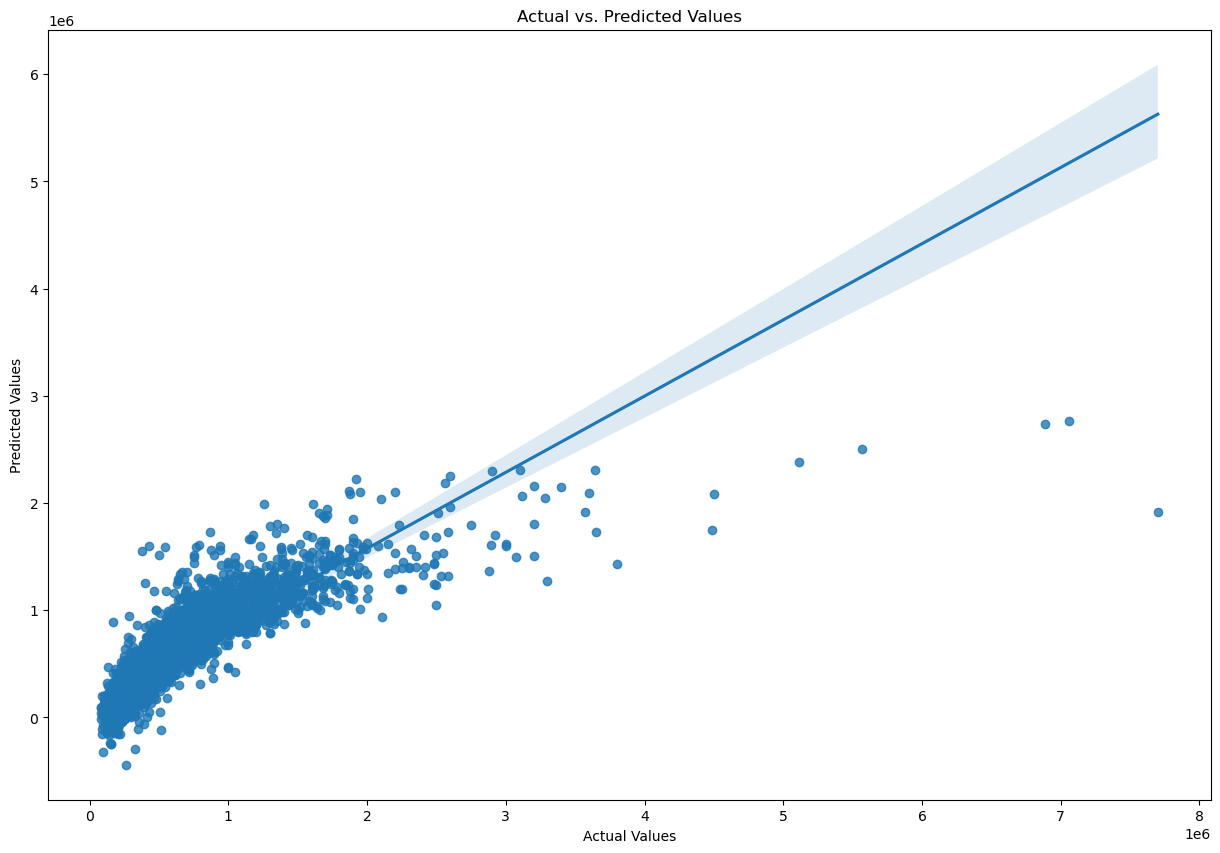

Model: KNeighborsRegressor
R2_score: 0.78
RMSE: 175898.19
MAE: 86103.4
MAPE: 15.91 %



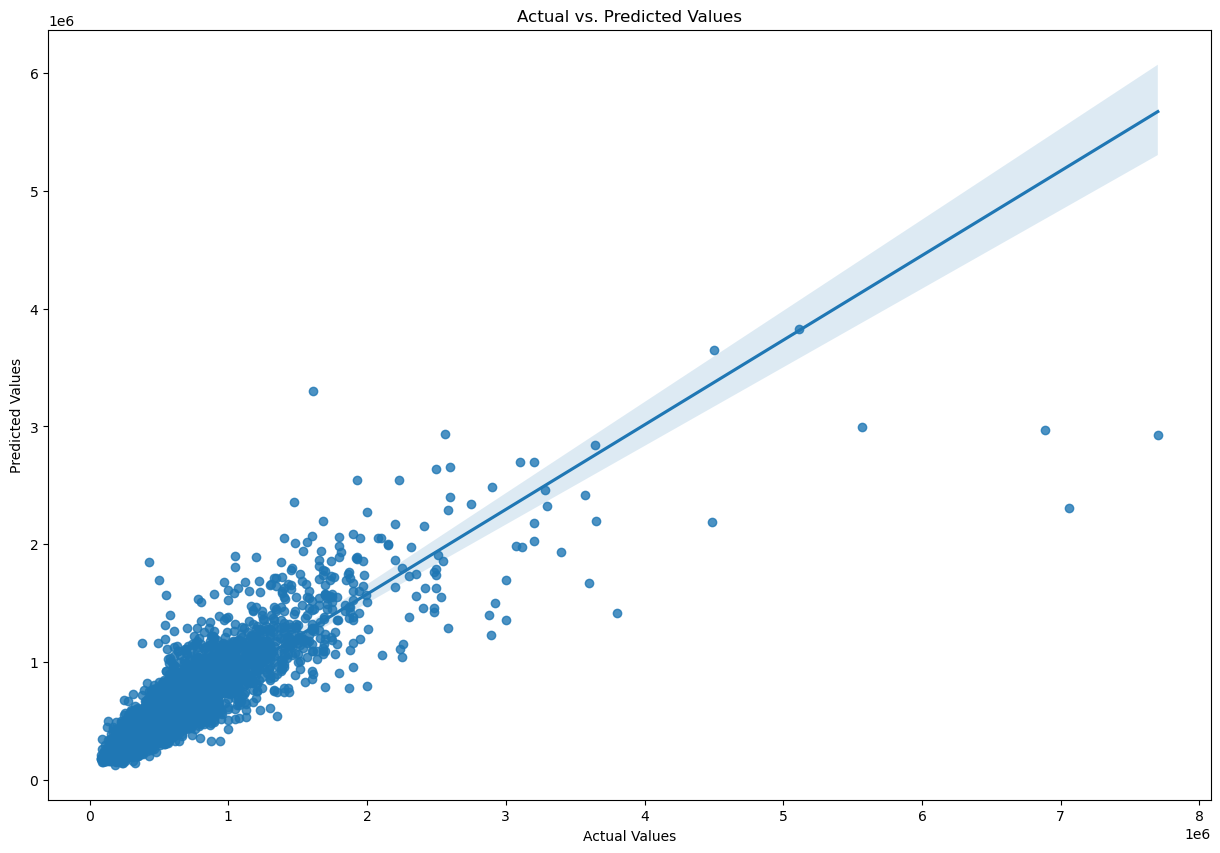

Model: MLPRegressor
R2_score: -0.02
RMSE: 377690.98
MAE: 214717.23
MAPE: 40.07 %



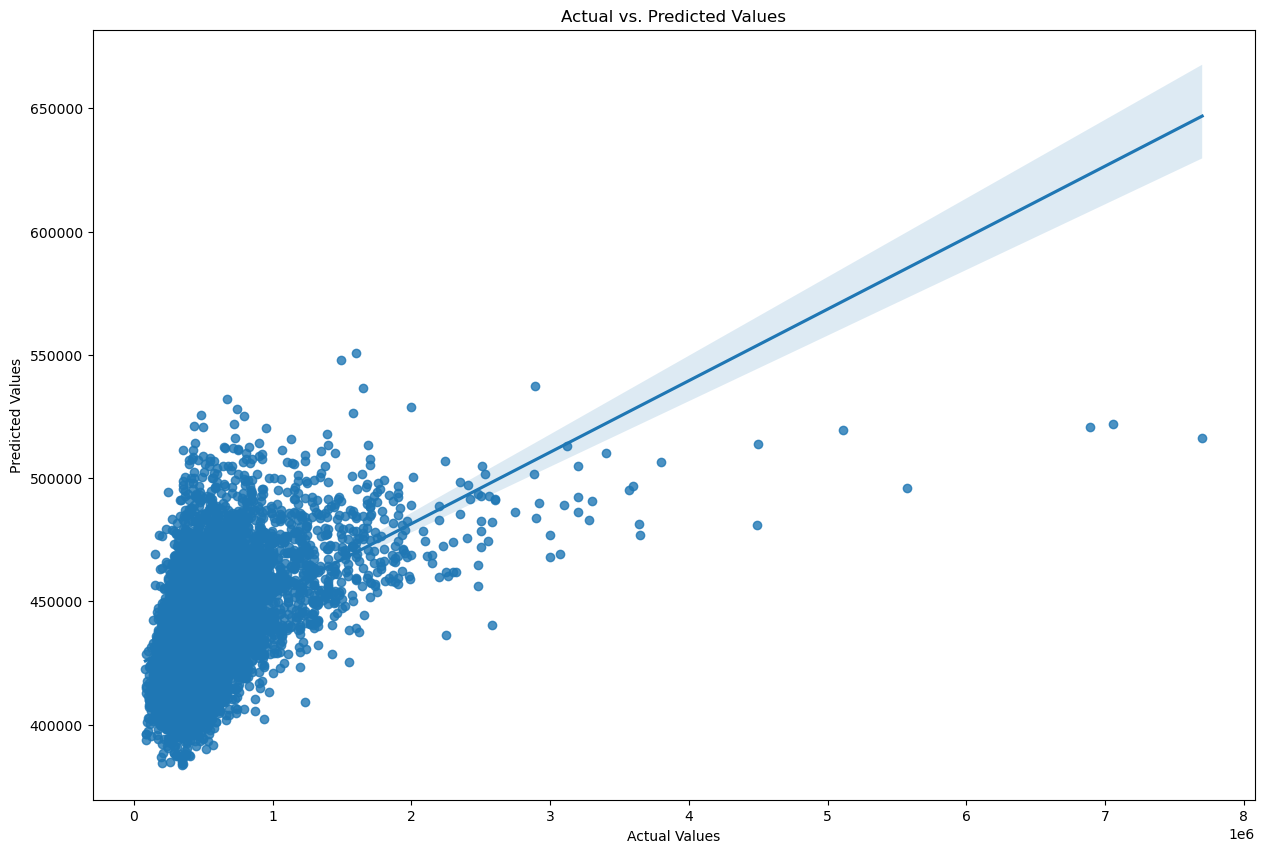

In [26]:
def regression_model_log(models, data):
    # Dropping 'long' and 'lat' columns
    long_lat = ['long', 'lat']
    data.drop(long_lat, axis=1, inplace= True)

    # Splitting the data into train and test sets
    X = pd.get_dummies(data.drop('price', axis=1))
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

    # Log transformation of numerical columns for the training set only
    num_df = X_train.select_dtypes(include='number').columns
    X_train[num_df] = np.log1p(X_train[num_df])

    for model in models:
        plt.figure(figsize=(15, 10))
        plt.xticks(fontsize=10)
        model.fit(X_train, y_train)
        # Apply log transformation to the test set using the same parameters as the training set
        X_test_transformed = X_test.copy()
        X_test_transformed[num_df] = np.log1p(X_test_transformed[num_df])

        pred = model.predict(X_test_transformed)
        score = model.score(X_test_transformed, y_test)
        rmse = mean_squared_error(y_test, pred, squared=False)
        mae = mean_absolute_error(y_test, pred)
        mape = mean_absolute_percentage_error(y_test, pred) * 100
        print("Model:", model.__class__.__name__)
        print("R2_score:", round(score, 2))
        print("RMSE:", round(rmse, 2))
        print("MAE:", round(mae, 2))
        print("MAPE:", round(mape, 2), "%")
        print()

        # Scatter plot of actual vs. predicted values
        sns.regplot(x=y_test, y=pred)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual vs. Predicted Values')
        plt.show()
        

regression_model_log(reg_models, df)


### Results:
After applying both Standard Scaler and log transforming separately we can compare the results.
- LinearRegression in both models did not perform well with the R2 staying the same with StdScaler and losing 6 with log.
- However KNeighborsRegressor nearly doubled in both forms of scaling with the highest score .81 with StdScaler and a  RMSE of 158,670.65 and a MAE of 81,336.86
-  MLPRegressor negatively performed with scaling with its highest R2 score at 0.08 with log scaling.

### 3.4: Feature Importance using VIF


In [27]:
df_dummied = pd.get_dummies(df)
df_dummied.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  bool   
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   yr_built       21597 non-null  int64  
 10  yr_renovated   21597 non-null  bool   
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
 13  price          21597 non-null  int64  
 14  zipcode_98001  21597 non-null  uint8  
 15  zipcode_98002  21597 non-null  uint8  
 16  zipcode_98003  21597 non-null  uint8  
 17  zipcode_98004  21597 non-null  uint8

In [28]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


vif = add_constant(df_dummied)

# Step 1: Check for missing values
if vif.isnull().values.any():
    raise ValueError("DataFrame contains missing values. Please handle them first.")

# Step 2: Check for infinite values for numeric columns only
numeric_columns = vif.select_dtypes(include=[np.number]).columns
if not np.isfinite(vif[numeric_columns].values).all():
    raise ValueError("DataFrame contains non-finite (e.g., infinity or NaN) values. Please handle them first.")

# Step 3: Calculate VIF for numeric columns only
threshold = 10

while True:
    # Calculate VIF for each numeric column (excluding the constant column)
    values = [variance_inflation_factor(vif[numeric_columns].values, i)
              for i in range(1, len(numeric_columns))]
    # Display VIF values for each column
    display(pd.DataFrame(values, index=numeric_columns[1:]).sort_values(0))
    if max(values) > threshold:
        col_index = values.index(max(values)) + 1
        column_name = numeric_columns[col_index]
        vif = vif.drop(column_name, axis=1)
        numeric_columns = vif.select_dtypes(include=[np.number]).columns
    else:
        break

,0
condition,1.265192
view,1.403354
bedrooms,1.719806
floors,1.860805
sqft_lot,2.116527
...,...
zipcode_98032,inf
zipcode_98031,inf
zipcode_98030,inf
zipcode_98039,inf


,0
zipcode_98148,1.158763
zipcode_98024,1.251691
condition,1.265192
zipcode_98010,1.283849
zipcode_98039,1.298598
...,...
sqft_living15,3.221025
bathrooms,3.317337
grade,3.888231
price,4.631885


#### Results
- I encountered some problems trying to calculate the VIF bbut found this work around using only the numeric columns.
- The actual results dont show any features with a value of 10. So no multicolinearity is seen to a high level.

## 4. Relooking at outliers.
- although there will always be outliers in the housing market we can try to remove a small amount to improve our model.
- We will look at the outliers in our target feature price with IQR.

In [29]:
import numpy as np

IQR = abs(np.quantile(df["price"], 0.25) - np.quantile(df["price"], 0.75)) * 1.5
lower_boundary = np.quantile(df["price"], 0.25) - IQR
upper_boundary = np.quantile(df["price"], 0.75) + IQR

outliers_count = ((df['price'] < lower_boundary) | (df['price'] > upper_boundary)).sum()
total_data = len(df)
percentage_of_outliers = round((outliers_count / total_data) * 100 ,2)

# Outliers for this column are values smaller than lower_boundary or bigger than upper_boundary:
print(percentage_of_outliers)
print("Lower Boundary:", lower_boundary)
print("Upper Boundary:", upper_boundary)


5.36
Lower Boundary: -162500.0
Upper Boundary: 1129500.0


In [30]:
outlier_df = df[(df["price"] < lower_boundary) | (df["price"] > upper_boundary)].sort_values("price")
outlier_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,
6613000015,4,3.00,3180,4649,2.0,False,0,4,9,1925,False,98105,2720,5980,1130000
9286000150,6,4.00,5330,18116,2.0,False,0,3,11,2000,False,98006,4590,16900,1130000
7856640560,5,3.50,3880,13885,2.0,False,3,4,9,1979,False,98006,3690,13885,1130000
5015001215,4,3.50,3170,4000,2.0,False,0,3,10,1999,False,98112,1770,4000,1130000
6117500320,3,2.25,2790,13791,1.0,False,3,3,8,2006,False,98166,2720,12600,1130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907500070,5,5.00,8000,23985,2.0,False,4,3,12,2009,False,98004,4600,21750,5350000
2470100110,5,5.75,9200,35069,2.0,False,0,3,13,2001,False,98039,3560,24345,5570000
9208900037,6,7.75,9890,31374,2.0,False,4,3,13,2001,False,98039,4540,42730,6890000


In [31]:
for col in df.columns:
    print(df[col].value_counts(), '\n')

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64 

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64 

5000     358
6000     290
4000     251
7200     220
4800     119
        ... 
22605      1
25248      1
9934       1
9142       1
1076       1
Name: sqft_lot, Length: 9776, dtype: int64 

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5     

In [32]:
for col in outlier_df.columns:
    print(outlier_df[col].value_counts(), '\n')

4     578
5     266
3     227
6      47
2      24
7       8
8       4
9       2
10      1
1       1
Name: bedrooms, dtype: int64 

3.50    189
2.50    183
3.25    164
2.25     89
3.00     88
2.75     78
3.75     72
4.00     61
4.25     51
4.50     49
1.75     33
2.00     21
4.75     18
5.00     13
5.25     10
1.50     10
5.50      9
6.00      5
5.75      3
6.50      2
1.25      2
1.00      2
8.00      2
6.25      2
6.75      1
7.75      1
Name: bathrooms, dtype: int64 

3160     10
3180      9
4410      8
2980      8
3200      8
         ..
2450      1
5280      1
2340      1
5610      1
12050     1
Name: sqft_living, Length: 435, dtype: int64 

5000     16
6000     15
7200     14
4000     13
5500     12
         ..
6105      1
10292     1
3997      1
20104     1
27600     1
Name: sqft_lot, Length: 977, dtype: int64 

2.0    749
1.0    234
1.5     82
2.5     51
3.0     41
3.5      1
Name: floors, dtype: int64 

False    1056
True      102
Name: waterfront, dtype: int64 

0    613
4    

#### A quick analysis of the value counts of the outliers and the original data.
- As expected we see our outliers show higher values in the most wanted features of a house. ie more bedrooms, bathrooms, sqft.
- Interesting to see most of our waterfront houses are in high value houses.
- also seen in grades past 11.

#### Now lets see how removing these affects our models.
- Again comparing StandardScaling and Log Scaling.

In [33]:
no_out_df = df[(df["price"] >= lower_boundary) & (df["price"] <= upper_boundary)]

Model: LinearRegression
R2_score: 0.57
RMSE: 133863.74
MAE: 105083.07
MAPE: 25.77 %



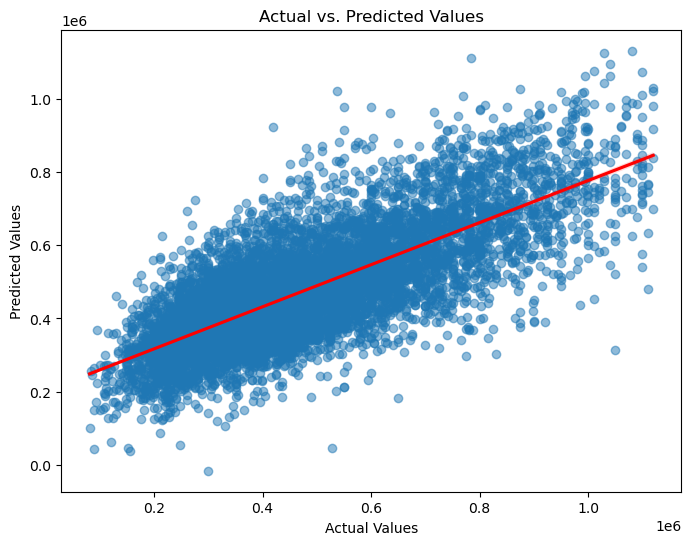

Model: KNeighborsRegressor
R2_score: 0.59
RMSE: 131550.86
MAE: 98999.71
MAPE: 23.38 %



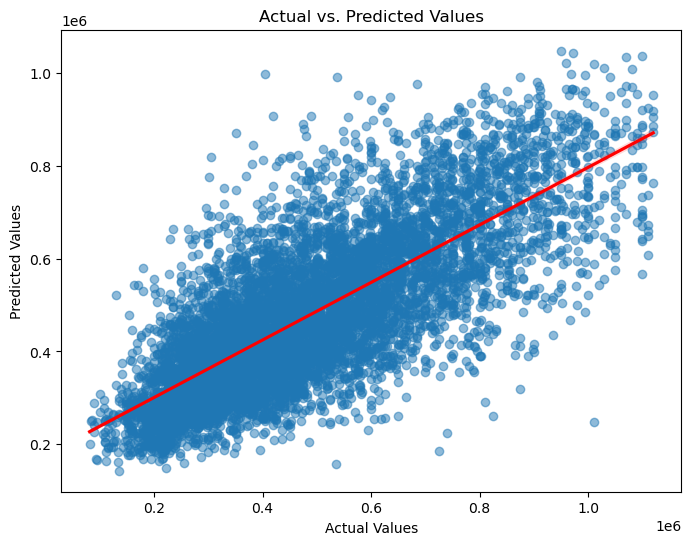

Model: MLPRegressor
R2_score: -4.1
RMSE: 463348.73
MAE: 421283.98
MAPE: 86.95 %



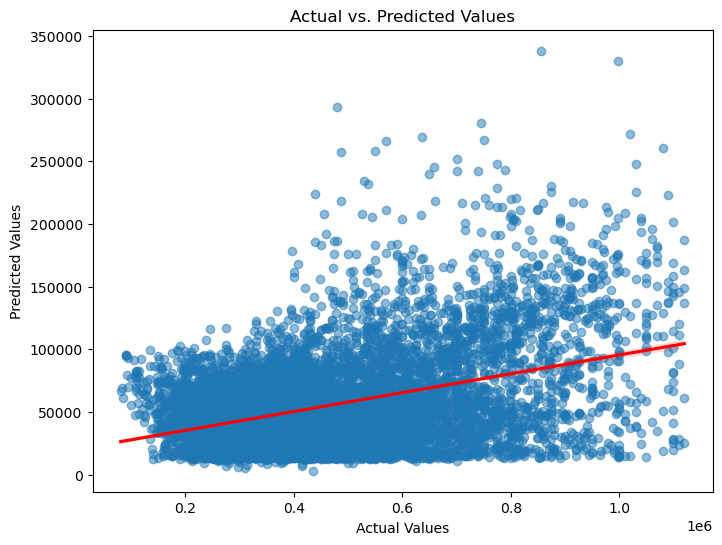

In [34]:
def regression_model_scaled (models, data):
    #Splitting the data
    X = data.drop('price', axis=1)
    y = data['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for model in models:
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
        score = model.score(X_test_scaled, y_test)
        rmse = mean_squared_error(y_test, pred, squared=False)
        mae = mean_absolute_error(y_test, pred)
        mape = mean_absolute_percentage_error(y_test, pred) * 100
        print("Model:", model.__class__.__name__)
        print("R2_score:", round(score, 2))
        print("RMSE:", round(rmse, 2))
        print("MAE:", round(mae, 2))
        print("MAPE:", round(mape, 2), "%")
        
        print()

        # Scatter plot of actual vs. predicted values
        plt.figure(figsize=(8, 6))
        sns.regplot(x=y_test, y=pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual vs. Predicted Values')
        plt.show()

regression_model_scaled(reg_models, no_out_df)

Model: LinearRegression
R2_score: 0.82
RMSE: 87219.97
MAE: 65152.83
MAPE: 15.48 %



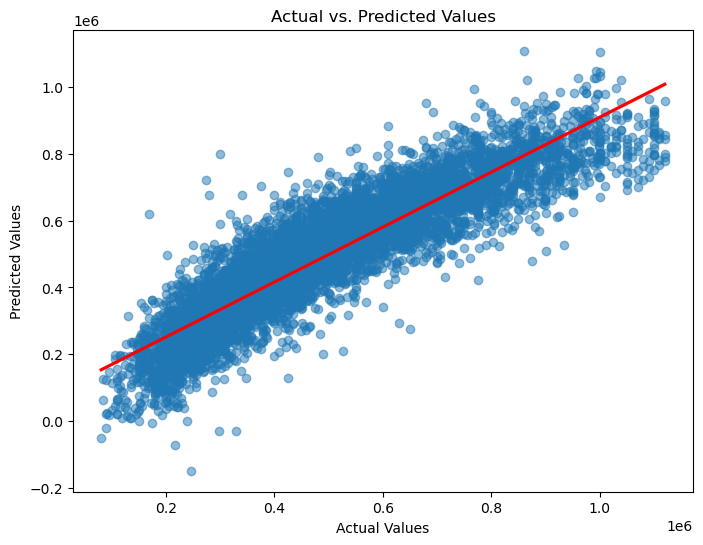

Model: KNeighborsRegressor
R2_score: 0.8
RMSE: 92319.72
MAE: 65288.18
MAPE: 14.84 %



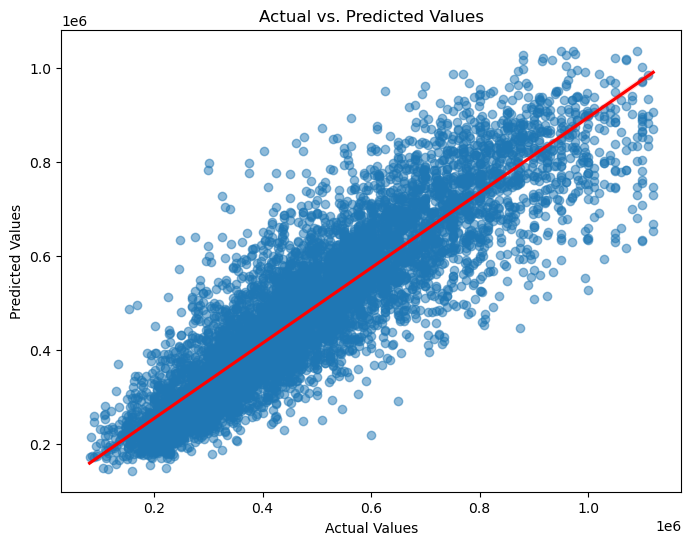

Model: MLPRegressor
R2_score: -0.04
RMSE: 209631.92
MAE: 160045.87
MAPE: 35.29 %



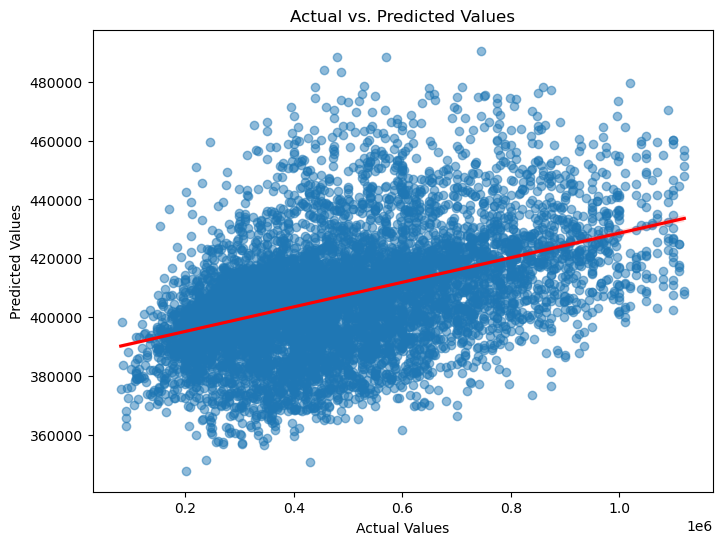

In [35]:
def regression_model_log(models, data):
   
    # Splitting the data into train and test sets
    X = pd.get_dummies(data.drop('price', axis=1))
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

    # Log transformation of numerical columns for the training set only
    num_df = X_train.select_dtypes(include='number').columns
    X_train[num_df] = np.log1p(X_train[num_df])

    for model in models:
        model.fit(X_train, y_train)
        # Apply log transformation to the test set using the same parameters as the training set
        X_test_transformed = X_test.copy()
        X_test_transformed[num_df] = np.log1p(X_test_transformed[num_df])

        pred = model.predict(X_test_transformed)
        score = model.score(X_test_transformed, y_test)
        rmse = mean_squared_error(y_test, pred, squared=False)
        mae = mean_absolute_error(y_test, pred)
        mape = mean_absolute_percentage_error(y_test, pred) * 100
        print("Model:", model.__class__.__name__)
        print("R2_score:", round(score, 2))
        print("RMSE:", round(rmse, 2))
        print("MAE:", round(mae, 2))
        print("MAPE:", round(mape, 2), "%")
        print()

        # Scatter plot of actual vs. predicted values
        plt.figure(figsize=(8, 6))
        sns.regplot(x=y_test, y=pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual vs. Predicted Values')
        plt.show()
        

regression_model_log(reg_models, no_out_df)

### Report and conclusions.
After trailing and testing different techniques it is time to compare results and find which techniques suit our data the best for our chosen Machine Learning model.


Log scaling without outliers is overall where we see the best results from our chosen models Linear Regression, KNeighborsRegressor and MLPRegressor, however throughout the project MLPRegressor was the least effective.

- Linear Regression--------------------KNeighborsRegressor

 R2_score: 0.82------------------------R2_score: 0.81
 
 RMSE: 87023.39------------------------RMSE: 89257.46
 
 MAE: 64793.14-------------------------MAE: 62934.13
 
 MAPE: 15.35 %-------------------------MAPE: 14.19 %

Comparing the two models Linear Regression performs slightly better in terms of R2 score and Rmse with average predictions deviating by 87,023.39. KNeighborsRegressor edges it slightly with MAE at on avergae 64,793.14 or 14.19% off the predictions. These are both good scores and seem to provide reasonable predictions.

However with excluding outliers we limit our model 
